In [1]:
import numpy as np
import re
import pandas as pd
import os
import json
from pandas.io.json import json_normalize
import ast
from matplotlib import pyplot as plt
import plotly.graph_objects as go
import plotly.offline as py
from scipy.stats import skew, boxcox
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from mpl_toolkits.mplot3d import Axes3D
import yaml
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from __future__ import unicode_literals
from collections import Counter
from math import *
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import classification_report, f1_score,accuracy_score ,confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from collections import Counter
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import IsolationForest
import matplotlib.gridspec as gridspec
from sklearn.impute import KNNImputer
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import eli5
import time
from datetime import datetime
from sklearn.preprocessing import LabelEncoder

from warnings import simplefilter
import ast
simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None  # default='warn'
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns', None)
import warnings
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning:

A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5



/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning:

unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning:

file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tensorflow13GcsFileSystemE']



****Lire les datasets****

In [2]:
train = pd.read_csv('../input/tmdb-box-office-prediction/train.csv')
test = pd.read_csv('../input/tmdb-box-office-prediction/test.csv')
sam_sub = pd.read_csv('../input/tmdb-box-office-prediction/sample_submission.csv')
print( "train dataset:", train.shape,"\n","test dataset: ",test.shape,"\n","sample_submission dataset:", sam_sub .shape)

train dataset: (3000, 23) 
 test dataset:  (4398, 22) 
 sample_submission dataset: (4398, 2)


In [3]:
# Diviser le dataframe en données d'entraînement et de test
train_df, test_df = train_test_split(train, test_size=0.3)

# Vérifier les dimensions des nouveaux dataframes
print("Train DataFrame:", train_df.shape)
print("Test DataFrame:", test_df.shape)

Train DataFrame: (2100, 23)
Test DataFrame: (900, 23)


In [4]:
train_df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
408,409,"[{'id': 91746, 'name': ""Bill & Ted's Most Exce...",10000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 35, '...",http://www.billandted.org/,tt0096928,en,Bill & Ted's Excellent Adventure,"In the small town of San Dimas, a few miles aw...",15.109261,/b2yKJ1STPklVSRtso2Tg4TPXK7u.jpg,"[{'name': 'Orion Pictures', 'id': 41}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2/17/89,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,History is about to be rewritten by two guys w...,Bill & Ted's Excellent Adventure,"[{'id': 931, 'name': 'jealousy'}, {'id': 1743,...","[{'cast_id': 1, 'character': 'Ted Logan', 'cre...","[{'credit_id': '52fe4308c3a36847f8035623', 'de...",40485039
760,761,NaN,6500000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0427944,en,Thank You for Smoking,The chief spokesperson and lobbyist Nick Naylo...,9.369527,/v8PKsbAGIvAhKbbRUjdQ3jgFD2S.jpg,"[{'name': 'Fox Searchlight Pictures', 'id': 43...","[{'iso_3166_1': 'US', 'name': 'United States o...",9/5/05,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Tobacco lobbyist Nick Naylor is trying to SAVE...,Thank You for Smoking,"[{'id': 494, 'name': 'father son relationship'...","[{'cast_id': 23, 'character': 'Nick Naylor', '...","[{'credit_id': '5671ad939251416374002bde', 'de...",24793509
1546,1547,NaN,0,"[{'id': 53, 'name': 'Thriller'}]",NaN,tt2032557,en,The Reluctant Fundamentalist,"In New York, a Pakistani native finds that his...",6.231928,/h8GW6hvvmzrKKZbdB59b6ome5ki.jpg,"[{'name': 'Mirabai Films', 'id': 6235}, {'name...","[{'iso_3166_1': 'QA', 'name': 'Qatar'}, {'iso_...",3/17/13,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Terror has two faces.,The Reluctant Fundamentalist,"[{'id': 242, 'name': 'new york'}, {'id': 321, ...","[{'cast_id': 7, 'character': 'Changez', 'credi...","[{'credit_id': '52fe4a6ac3a368484e151e79', 'de...",519535
701,702,NaN,5000000,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",http://www.stayinyourroom.com/,tt3567288,en,The Visit,The terrifying story of a brother and sister w...,15.021058,/32tNtTEQ1vIOLm1hEOSFkVwJT5D.jpg,"[{'name': 'Blumhouse Productions', 'id': 3172}...","[{'iso_3166_1': 'US', 'name': 'United States o...",9/10/15,94.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,No one loves you like your grandparents.,The Visit,"[{'id': 897, 'name': 'rap music'}, {'id': 904,...","[{'cast_id': 7, 'character': 'Rebecca Jamison'...","[{'credit_id': '5539c400c3a3687845007bc0', 'de...",98450062
1681,1682,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",12/22/95,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,"[{'id': 818, 'name': 'based on novel'}, {'id':...","[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",81452156


In [5]:
# Regarder le contenu du data d'entraînement
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2100 entries, 408 to 2894
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2100 non-null   int64  
 1   belongs_to_collection  424 non-null    object 
 2   budget                 2100 non-null   int64  
 3   genres                 2095 non-null   object 
 4   homepage               677 non-null    object 
 5   imdb_id                2100 non-null   object 
 6   original_language      2100 non-null   object 
 7   original_title         2100 non-null   object 
 8   overview               2093 non-null   object 
 9   popularity             2100 non-null   float64
 10  poster_path            2099 non-null   object 
 11  production_companies   2002 non-null   object 
 12  production_countries   2067 non-null   object 
 13  release_date           2100 non-null   object 
 14  runtime                2098 non-null   float64
 15  sp

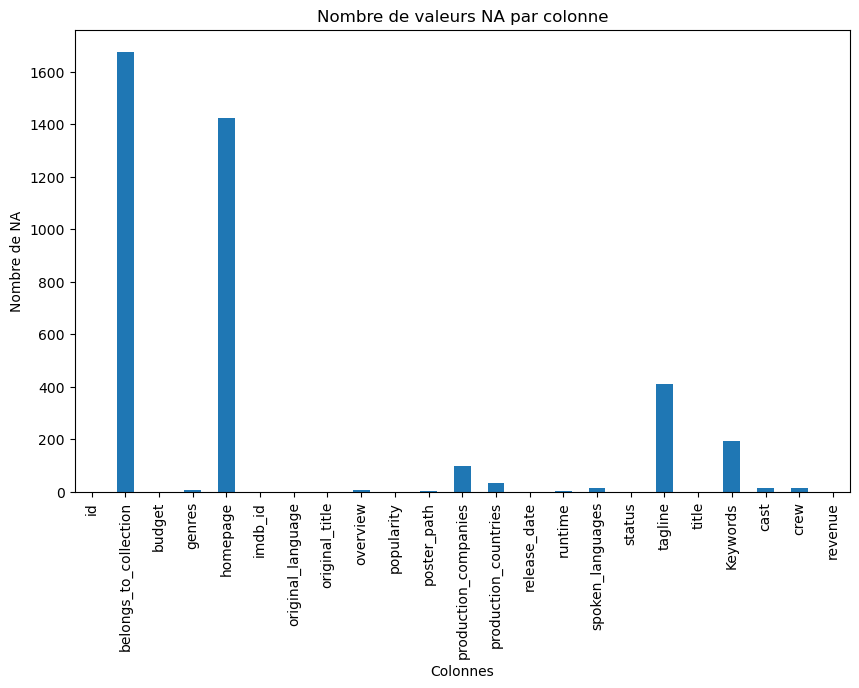

In [6]:
# Compter les valeurs manquantes par colonne
na_count_train = train_df.isna().sum()

# Créer le diagramme à barres
plt.figure(figsize=(10, 6))
na_count_train.plot(kind='bar')
plt.xlabel('Colonnes')
plt.ylabel('Nombre de NA')
plt.title('Nombre de valeurs NA par colonne')
plt.show()

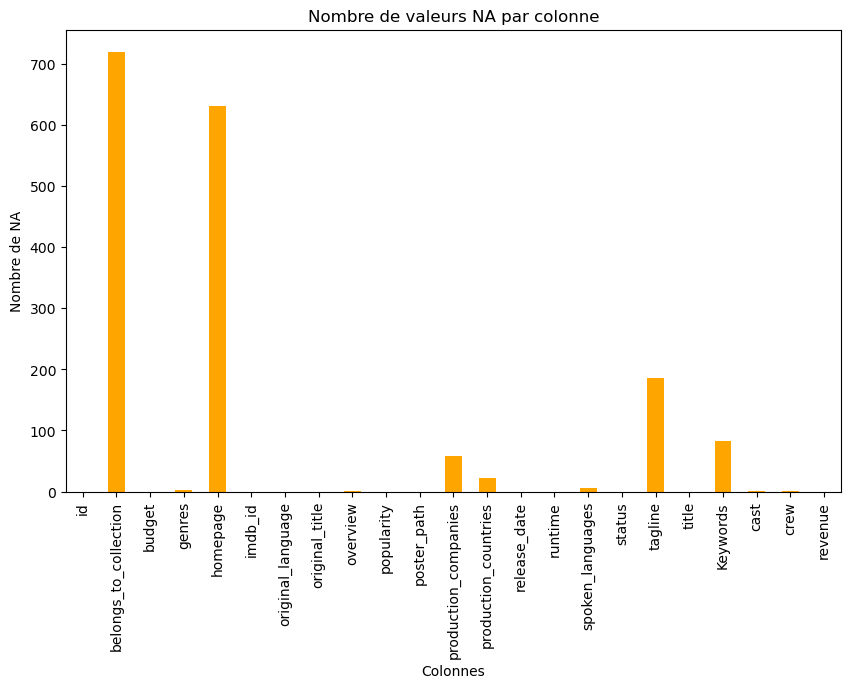

In [7]:
# Compter les valeurs manquantes par colonne
na_count_test = test_df.isna().sum()

# Créer le diagramme à barres
plt.figure(figsize=(10, 6))
na_count_test.plot(kind='bar', color='orange')
plt.xlabel('Colonnes')
plt.ylabel('Nombre de NA')
plt.title('Nombre de valeurs NA par colonne')
plt.show()

In [8]:
# Corriger les erreurs selon les infos externes
train.loc[train['id'] == 16,'revenue'] = 192864          # Skinning
train.loc[train['id'] == 90,'budget'] = 30000000         # Sommersby          
train.loc[train['id'] == 118,'budget'] = 60000000        # Wild Hogs
train.loc[train['id'] == 149,'budget'] = 18000000        # Beethoven
train.loc[train['id'] == 313,'revenue'] = 12000000       # The Cookout 
train.loc[train['id'] == 451,'revenue'] = 12000000       # Chasing Liberty
train.loc[train['id'] == 464,'budget'] = 20000000        # Parenthood
train.loc[train['id'] == 470,'budget'] = 13000000        # The Karate Kid, Part II
train.loc[train['id'] == 513,'budget'] = 930000          # From Prada to Nada
train.loc[train['id'] == 797,'budget'] = 8000000         # Welcome to Dongmakgol
train.loc[train['id'] == 819,'budget'] = 90000000        # Alvin and the Chipmunks: The Road Chip
train.loc[train['id'] == 850,'budget'] = 90000000        # Modern Times
train.loc[train['id'] == 1112,'budget'] = 7500000        # An Officer and a Gentleman
train.loc[train['id'] == 1131,'budget'] = 4300000        # Smokey and the Bandit   
train.loc[train['id'] == 1359,'budget'] = 10000000       # Stir Crazy 
train.loc[train['id'] == 1542,'budget'] = 1              # All at Once
train.loc[train['id'] == 1542,'budget'] = 15800000       # Crocodile Dundee II
train.loc[train['id'] == 1571,'budget'] = 4000000        # Lady and the Tramp
train.loc[train['id'] == 1714,'budget'] = 46000000       # The Recruit
train.loc[train['id'] == 1721,'budget'] = 17500000       # Cocoon
train.loc[train['id'] == 1865,'revenue'] = 25000000      # Scooby-Doo 2: Monsters Unleashed
train.loc[train['id'] == 2268,'budget'] = 17500000       # Madea Goes to Jail budget
train.loc[train['id'] == 2491,'revenue'] = 6800000       # Never Talk to Strangers
train.loc[train['id'] == 2602,'budget'] = 31000000       # Mr. Holland's Opus
train.loc[train['id'] == 2612,'budget'] = 15000000       # Field of Dreams
train.loc[train['id'] == 2696,'budget'] = 10000000       # Nurse 3-D
train.loc[train['id'] == 2801,'budget'] = 10000000       # Fracture
test.loc[test['id'] == 3889,'budget'] = 15000000       # Colossal
test.loc[test['id'] == 6733,'budget'] = 5000000        # The Big Sick
test.loc[test['id'] == 3197,'budget'] = 8000000        # High-Rise
test.loc[test['id'] == 6683,'budget'] = 50000000       # The Pink Panther 2
test.loc[test['id'] == 5704,'budget'] = 4300000        # French Connection II
test.loc[test['id'] == 6109,'budget'] = 281756         # Dogtooth
test.loc[test['id'] == 7242,'budget'] = 10000000       # Addams Family Values
test.loc[test['id'] == 7021,'budget'] = 17540562       #  Two Is a Family
test.loc[test['id'] == 5591,'budget'] = 4000000        # The Orphanage
test.loc[test['id'] == 4282,'budget'] = 20000000       # Big Top Pee-wee

In [9]:
def preprocess_dates(df):
    # Convertir en datetime et extraire des features
    df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
    df['release_year'] = df['release_date'].dt.year
    df['release_month'] = df['release_date'].dt.month
    df['release_day'] = df['release_date'].dt.day
    df['release_dow'] = df['release_date'].dt.dayofweek
    
    # Corriger les années futures
    df['release_year'] = np.where(df['release_year'] > 2019, df['release_year'] - 100, df['release_year'])
    
    # Remplir les valeurs manquantes avec le mode
    for col in ['release_year', 'release_month', 'release_day']:
        df[col].fillna(df[col].mode()[0], inplace=True)
        
    # Reconstruire la colonne 'release_date' si nécessaire
    df['release_date'] = pd.to_datetime(df[['release_year', 'release_month', 'release_day']].astype(str).agg('-'.join, axis=1))

    return df


In [10]:
train_df=preprocess_dates(train_df)
test_df=preprocess_dates(test_df)

print(train_df['release_date'].head(10))

408    1989-02-17
760    2005-09-05
1546   2013-03-17
701    2015-09-10
1681   1995-12-22
648    1944-05-15
2134   2004-05-05
769    1988-12-24
991    2014-01-19
803    1973-11-08
Name: release_date, dtype: datetime64[ns]


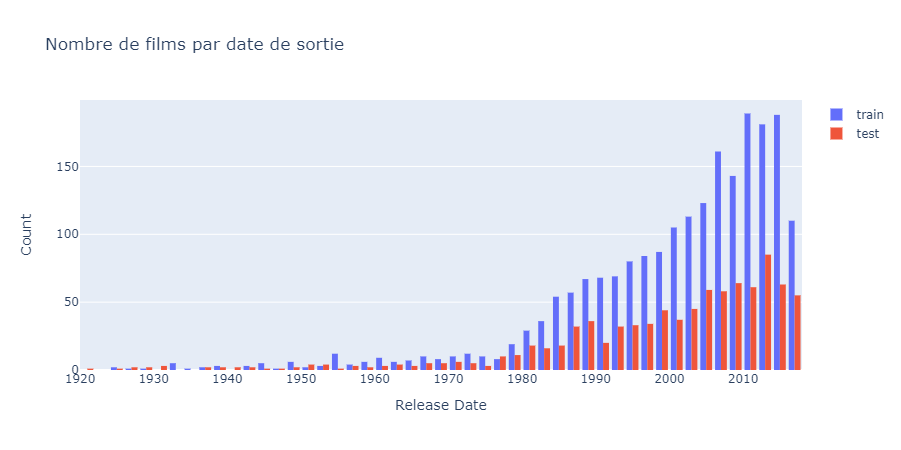

In [11]:
# Après avoir prétraité les dates avec votre fonction `preprocess_dates`
train_df = preprocess_dates(train_df)
test_df = preprocess_dates(test_df)

# Compter le nombre de films par date de sortie
d1 = train_df['release_date'].value_counts().sort_index()
d2 = test_df['release_date'].value_counts().sort_index()

# Créer l'objet graphique
data = [go.Histogram(x=d1.index, y=d1.values, name='train', histfunc='sum'),
        go.Histogram(x=d2.index, y=d2.values, name='test', histfunc='sum')]

layout = go.Layout(
    title="Nombre de films par date de sortie",
    xaxis=dict(title='Release Date'),
    yaxis=dict(title='Count'),
    legend=dict(orientation="v")
)

# Afficher le graphique
py.iplot(dict(data=data, layout=layout))

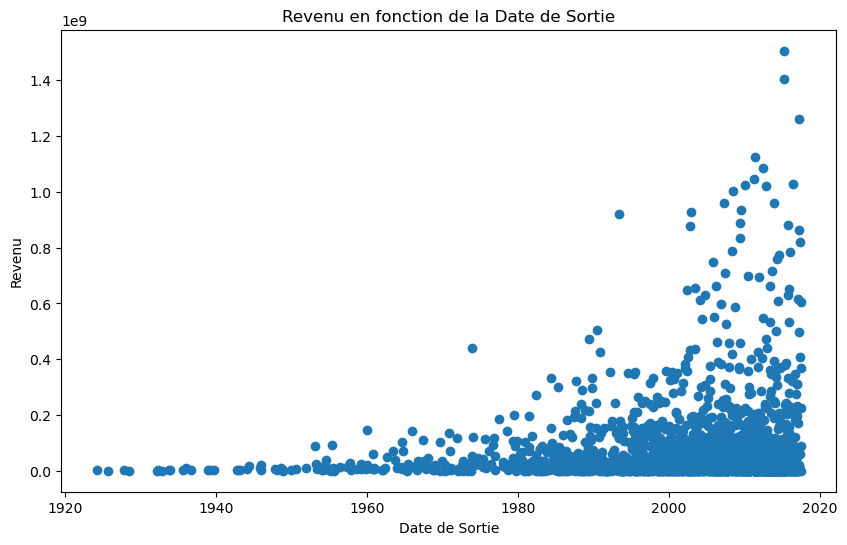

In [12]:
# Après avoir prétraité les données
train_df = preprocess_dates(train_df)

plt.figure(figsize=(10,6))
plt.scatter(train_df['release_date'], train_df['revenue'])
plt.xlabel('Date de Sortie')
plt.ylabel('Revenu')
plt.title('Revenu en fonction de la Date de Sortie')
plt.show()

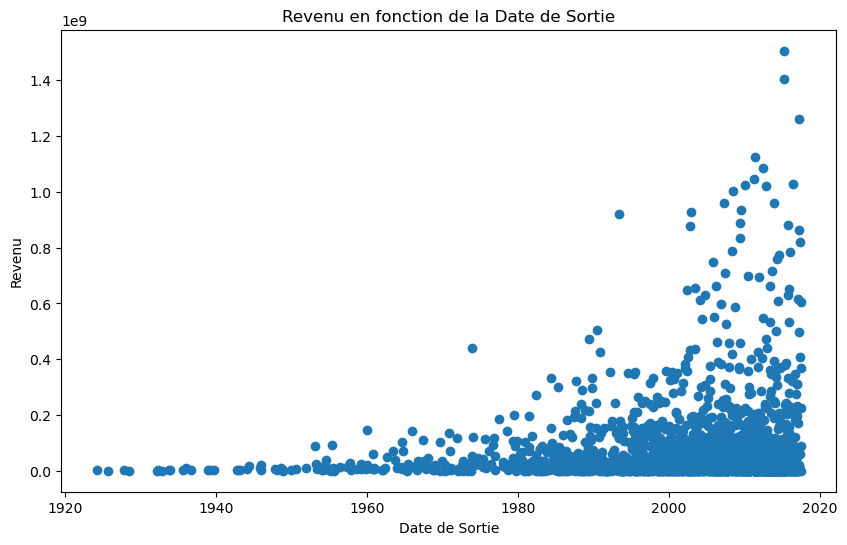

In [13]:
# Après avoir prétraité les données
train_df = preprocess_dates(train_df)

plt.figure(figsize=(10,6))
plt.scatter(train_df['release_date'], train_df['revenue'])
plt.xlabel('Date de Sortie')
plt.ylabel('Revenu')
plt.title('Revenu en fonction de la Date de Sortie')
plt.show()

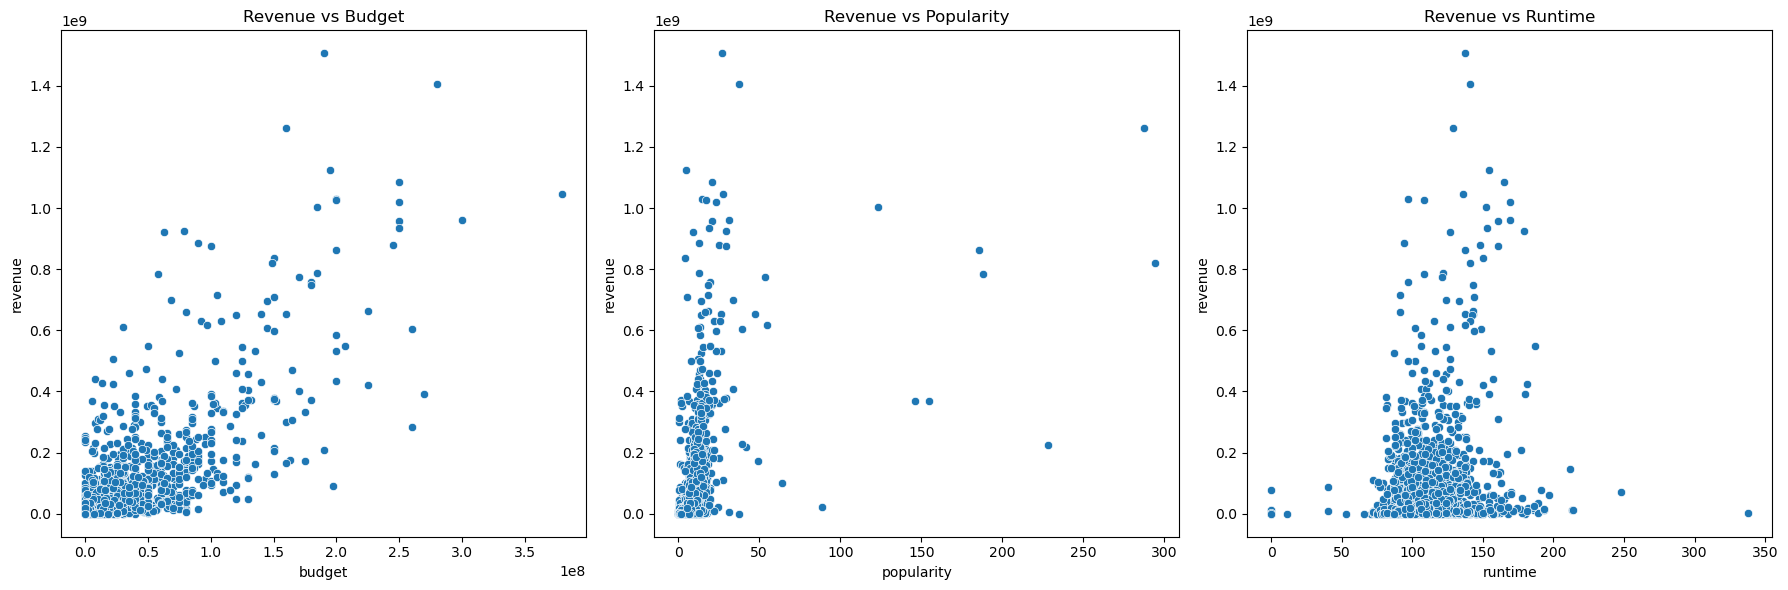

In [14]:
# Créer une figure et une grille de sous-tracés
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot pour revenue vs budget
sns.scatterplot(x='budget', y='revenue', data=train_df, ax=axes[0])
axes[0].set_title('Revenue vs Budget')

# Plot pour revenue vs popularity
sns.scatterplot(x='popularity', y='revenue', data=train_df, ax=axes[1])
axes[1].set_title('Revenue vs Popularity')

# Plot pour revenue vs runtime
sns.scatterplot(x='runtime', y='revenue', data=train_df, ax=axes[2])
axes[2].set_title('Revenue vs Runtime')

# Afficher les graphiques
plt.tight_layout()
plt.show()

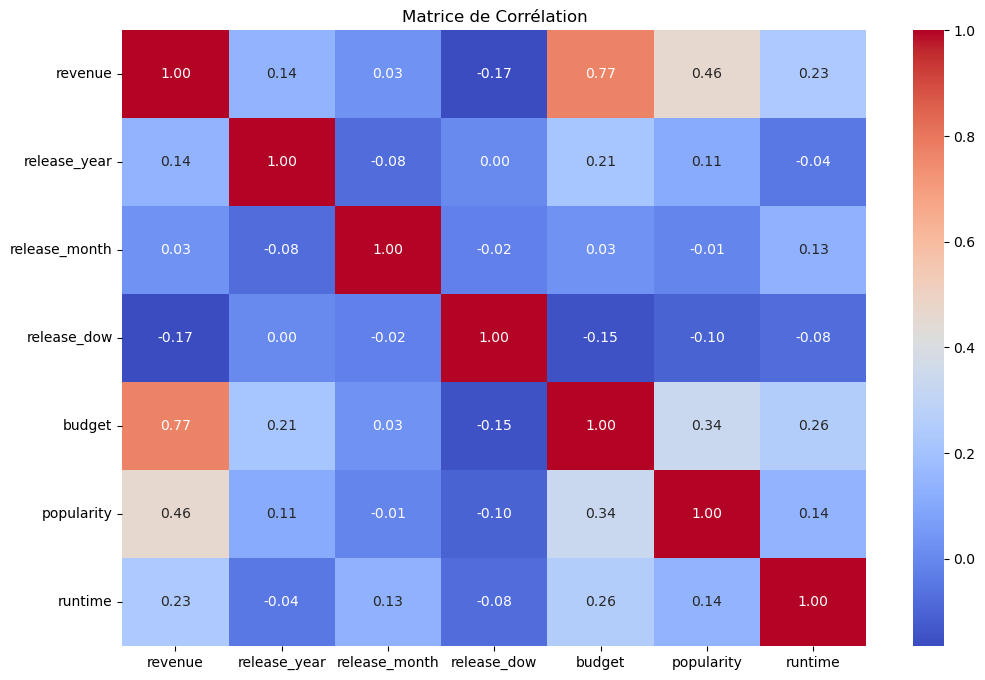

In [15]:
# Toutes les colonnes sont numériques.
train_df['release_date'] = pd.to_datetime(train_df['release_date']).astype(int)
train_df['release_month'] = train_df['release_month'].astype(int)
train_df['release_dow'] = train_df['release_dow'].astype(int)

# Sélectionner les colonnes d'intérêt
cols_of_interest = ['revenue', 'release_year', 'release_month', 'release_dow', 'budget', 'popularity', 'runtime']

# Calculer la matrice de corrélation
corr_matrix = train_df[cols_of_interest].corr()

# Créer une heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de Corrélation')
plt.show()


In [16]:
def looks_like_json(value):
    if isinstance(value, str):
        return (value.startswith('{') and value.endswith('}')) or (value.startswith('[') and value.endswith(']'))
    return False

json_columns = []
for col in train_df.columns:
    sample = train_df[col].dropna().sample(5)  # Vous pouvez augmenter la taille de l'échantillon pour une détection plus précise
    if sample.apply(looks_like_json).all():  # Si tous les échantillons ressemblent à du JSON
        json_columns.append(col)

print("Colonnes qui semblent contenir des données JSON:", json_columns)
print(type(train_df['genres'].dropna().iloc[0]))

Colonnes qui semblent contenir des données JSON: ['belongs_to_collection', 'genres', 'production_companies', 'production_countries', 'spoken_languages', 'Keywords', 'cast', 'crew']
<class 'str'>


In [17]:
dict_columns = ['belongs_to_collection', 'genres', 'production_companies',
                'production_countries', 'spoken_languages', 'Keywords', 'cast', 'crew']

def text_to_dict(df):
    for column in dict_columns:
        df[column] = df[column].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x) )
    return df
        
train_df = text_to_dict(train_df)
test_df = text_to_dict(test_df)

In [18]:
# Affiche un exemple de données dans la colonne 'genres' après la transformation
print("Exemple de données dans la colonne 'genres' après transformation:")
sample_value = train_df['genres'].dropna().iloc[0]  # Prend la première valeur non nulle
print(sample_value)
print(type(sample_value))  # Ceci devrait afficher <class 'list'> ou <class 'dict'>

Exemple de données dans la colonne 'genres' après transformation:
[{'id': 12, 'name': 'Adventure'}, {'id': 35, 'name': 'Comedy'}, {'id': 878, 'name': 'Science Fiction'}]
<class 'list'>


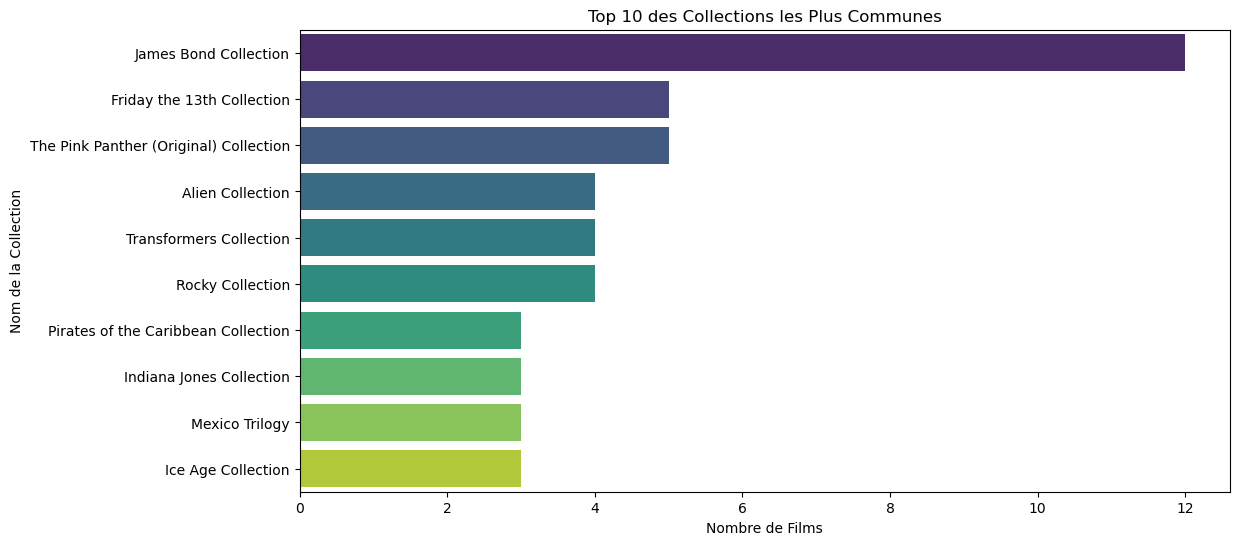

In [19]:
# Créer une nouvelle colonne 'collection_name' qui contient le nom de la collection si elle existe, sinon 'No Collection'
train_df['collection_name'] = train_df['belongs_to_collection'].apply(lambda x: x[0]['name'] if x else 'No Collection')
test_df['collection_name'] = test_df['belongs_to_collection'].apply(lambda x: x[0]['name'] if x else 'No Collection')

# Créer la colonne 'has_collection' comme précédemment
train_df['has_collection'] = train_df['belongs_to_collection'].apply(lambda x: 1 if x else 0)
test_df['has_collection'] = test_df['belongs_to_collection'].apply(lambda x: 1 if x else 0)

# Supprimer la colonne 'belongs_to_collection' puisqu'elle n'est plus nécessaire
train_df = train_df.drop(['belongs_to_collection'], axis=1)
test_df = test_df.drop(['belongs_to_collection'], axis=1)

# Afficher les 10 collections les plus communes
most_common_collections = train_df['collection_name'].value_counts()[1:11]  # [1:11] car nous avons 'No Collection' en tant que valeur la plus commune

# Visualiser avec un graphique à barres
plt.figure(figsize=(12,6))
sns.barplot(x=most_common_collections.values, y=most_common_collections.index, palette='viridis')
plt.title('Top 10 des Collections les Plus Communes')
plt.xlabel('Nombre de Films')
plt.ylabel('Nom de la Collection')
plt.show()


In [20]:
train_df.head()

,id,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,release_year,release_month,release_day,release_dow,collection_name,has_collection
408,409,10000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 35, '...",http://www.billandted.org/,tt0096928,en,Bill & Ted's Excellent Adventure,"In the small town of San Dimas, a few miles aw...",15.109261,/b2yKJ1STPklVSRtso2Tg4TPXK7u.jpg,"[{'name': 'Orion Pictures', 'id': 41}]","[{'iso_3166_1': 'US', 'name': 'United States o...",603676800000000000,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,History is about to be rewritten by two guys w...,Bill & Ted's Excellent Adventure,"[{'id': 931, 'name': 'jealousy'}, {'id': 1743,...","[{'cast_id': 1, 'character': 'Ted Logan', 'cre...","[{'credit_id': '52fe4308c3a36847f8035623', 'de...",40485039,1989,2,17,4,Bill & Ted's Most Excellent Collection,1
760,761,6500000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0427944,en,Thank You for Smoking,The chief spokesperson and lobbyist Nick Naylo...,9.369527,/v8PKsbAGIvAhKbbRUjdQ3jgFD2S.jpg,"[{'name': 'Fox Searchlight Pictures', 'id': 43...","[{'iso_3166_1': 'US', 'name': 'United States o...",1125878400000000000,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Tobacco lobbyist Nick Naylor is trying to SAVE...,Thank You for Smoking,"[{'id': 494, 'name': 'father son relationship'...","[{'cast_id': 23, 'character': 'Nick Naylor', '...","[{'credit_id': '5671ad939251416374002bde', 'de...",24793509,2005,9,5,0,No Collection,0
1546,1547,0,"[{'id': 53, 'name': 'Thriller'}]",NaN,tt2032557,en,The Reluctant Fundamentalist,"In New York, a Pakistani native finds that his...",6.231928,/h8GW6hvvmzrKKZbdB59b6ome5ki.jpg,"[{'name': 'Mirabai Films', 'id': 6235}, {'name...","[{'iso_3166_1': 'QA', 'name': 'Qatar'}, {'iso_...",1363478400000000000,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Terror has two faces.,The Reluctant Fundamentalist,"[{'id': 242, 'name': 'new york'}, {'id': 321, ...","[{'cast_id': 7, 'character': 'Changez', 'credi...","[{'credit_id': '52fe4a6ac3a368484e151e79', 'de...",519535,2013,3,17,6,No Collection,0
701,702,5000000,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",http://www.stayinyourroom.com/,tt3567288,en,The Visit,The terrifying story of a brother and sister w...,15.021058,/32tNtTEQ1vIOLm1hEOSFkVwJT5D.jpg,"[{'name': 'Blumhouse Productions', 'id': 3172}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1441843200000000000,94.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,No one loves you like your grandparents.,The Visit,"[{'id': 897, 'name': 'rap music'}, {'id': 904,...","[{'cast_id': 7, 'character': 'Rebecca Jamison'...","[{'credit_id': '5539c400c3a3687845007bc0', 'de...",98450062,2015,9,10,3,No Collection,0
1681,1682,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",819590400000000000,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,"[{'id': 818, 'name': 'based on novel'}, {'id':...","[{'cast_id': 1, 'character': 'Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",81452156,1995,12,22,4,No Collection,0


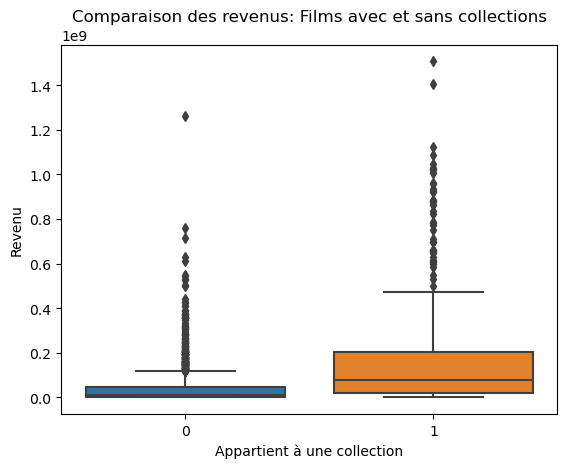

In [21]:
sns.boxplot(x='has_collection', y='revenue', data=train_df)
plt.title('Comparaison des revenus: Films avec et sans collections')
plt.xlabel('Appartient à une collection')
plt.ylabel('Revenu')
plt.show()

In [22]:
# Identifier tous les genres uniques
unique_genres = set()
# Assurer que les deux DataFrames ont les mêmes genres
for genre in unique_genres:
    if genre not in train_df.columns:
        train_df[genre] = 0
    if genre not in test_df.columns:
        test_df[genre] = 0
for genre_list in train_df['genres']:
    for genre in genre_list:
        unique_genres.add(genre['name'])

# Créer des colonnes pour chaque genre unique
for genre in unique_genres:
    train_df[genre] = train_df['genres'].apply(lambda x: 1 if any(d['name'] == genre for d in x) else 0)
    test_df[genre] = test_df['genres'].apply(lambda x: 1 if any(d['name'] == genre for d in x) else 0)

# Supprimer la colonne d'origine 'genres'
train_df = train_df.drop(['genres'], axis=1)
test_df = test_df.drop(['genres'], axis=1)



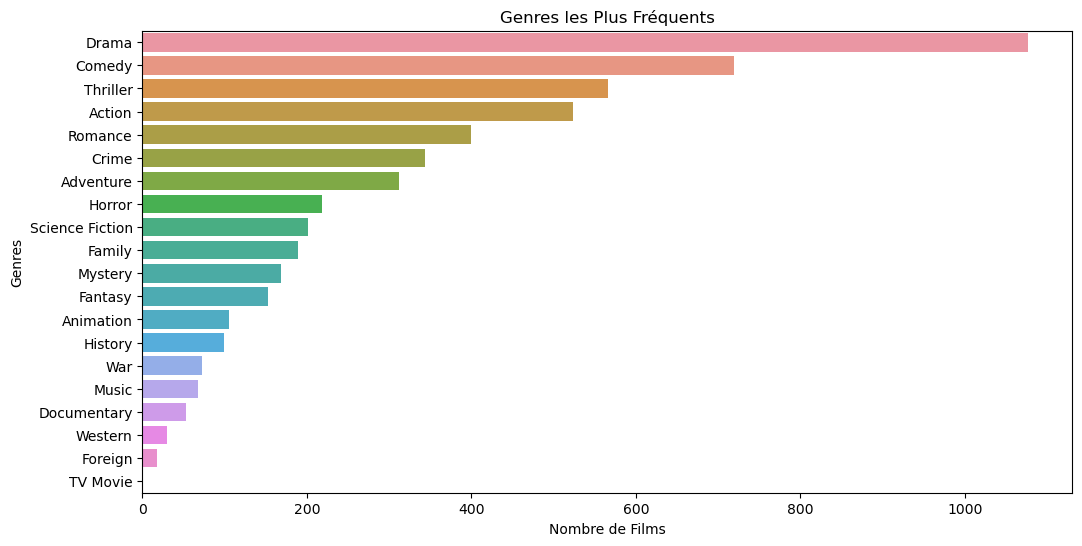

In [23]:
# Compter le nombre de fois chaque genre apparaît
genre_counts = {genre: train_df[genre].sum() for genre in unique_genres}
sorted_genres = sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)

# Graphique à barres
plt.figure(figsize=(12, 6))
sns.barplot(x=[count for genre, count in sorted_genres], y=[genre for genre, count in sorted_genres])
plt.title("Genres les Plus Fréquents")
plt.xlabel("Nombre de Films")
plt.ylabel("Genres")
plt.show()


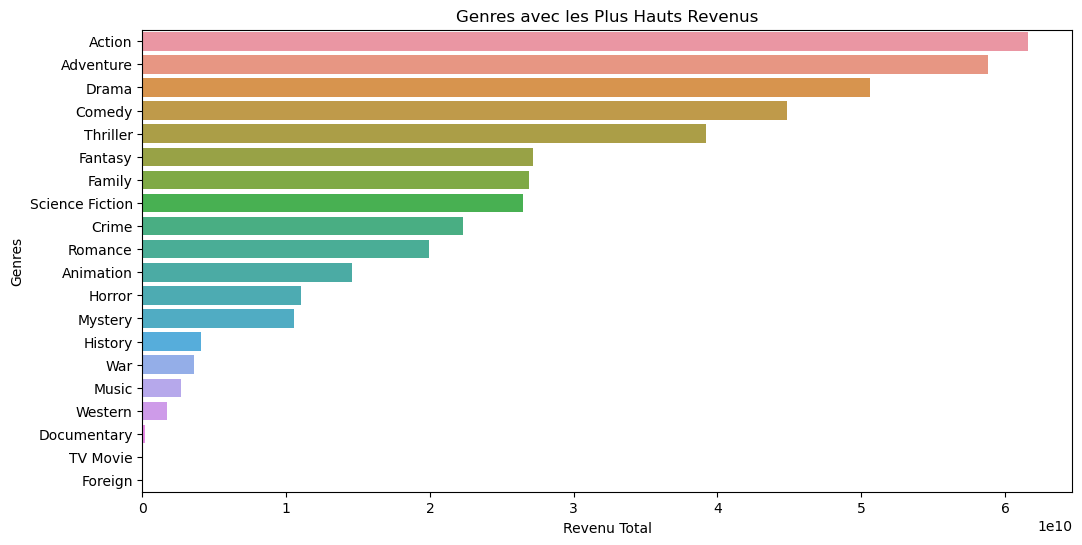

In [24]:
# Somme des revenus pour chaque genre
genre_revenue = {genre: train_df[train_df[genre] == 1]['revenue'].sum() for genre in unique_genres}
sorted_genre_revenue = sorted(genre_revenue.items(), key=lambda x: x[1], reverse=True)

# Graphique à barres
plt.figure(figsize=(12, 6))
sns.barplot(x=[revenue for genre, revenue in sorted_genre_revenue], y=[genre for genre, revenue in sorted_genre_revenue])
plt.title("Genres avec les Plus Hauts Revenus")
plt.xlabel("Revenu Total")
plt.ylabel("Genres")
plt.show()


In [25]:
train_df.head()

,id,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,release_year,release_month,release_day,release_dow,collection_name,has_collection,Mystery,Thriller,Western,Documentary,War,Horror,Foreign,Drama,Adventure,Science Fiction,Action,Romance,Animation,Crime,Comedy,TV Movie,Family,Fantasy,History,Music
408,409,10000000,http://www.billandted.org/,tt0096928,en,Bill & Ted's Excellent Adventure,"In the small town of San Dimas, a few miles aw...",15.109261,/b2yKJ1STPklVSRtso2Tg4TPXK7u.jpg,"[{'name': 'Orion Pictures', 'id': 41}]","[{'iso_3166_1': 'US', 'name': 'United States o...",603676800000000000,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,History is about to be rewritten by two guys w...,Bill & Ted's Excellent Adventure,"[{'id': 931, 'name': 'jealousy'}, {'id': 1743,...","[{'cast_id': 1, 'character': 'Ted Logan', 'cre...","[{'credit_id': '52fe4308c3a36847f8035623', 'de...",40485039,1989,2,17,4,Bill & Ted's Most Excellent Collection,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0
760,761,6500000,NaN,tt0427944,en,Thank You for Smoking,The chief spokesperson and lobbyist Nick Naylo...,9.369527,/v8PKsbAGIvAhKbbRUjdQ3jgFD2S.jpg,"[{'name': 'Fox Searchlight Pictures', 'id': 43...","[{'iso_3166_1': 'US', 'name': 'United States o...",1125878400000000000,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Tobacco lobbyist Nick Naylor is trying to SAVE...,Thank You for Smoking,"[{'id': 494, 'name': 'father son relationship'...","[{'cast_id': 23, 'character': 'Nick Naylor', '...","[{'credit_id': '5671ad939251416374002bde', 'de...",24793509,2005,9,5,0,No Collection,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1546,1547,0,NaN,tt2032557,en,The Reluctant Fundamentalist,"In New York, a Pakistani native finds that his...",6.231928,/h8GW6hvvmzrKKZbdB59b6ome5ki.jpg,"[{'name': 'Mirabai Films', 'id': 6235}, {'name...","[{'iso_3166_1': 'QA', 'name': 'Qatar'}, {'iso_...",1363478400000000000,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Terror has two faces.,The Reluctant Fundamentalist,"[{'id': 242, 'name': 'new york'}, {'id': 321, ...","[{'cast_id': 7, 'character': 'Changez', 'credi...","[{'credit_id': '52fe4a6ac3a368484e151e79', 'de...",519535,2013,3,17,6,No Collection,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
701,702,5000000,http://www.stayinyourroom.com/,tt3567288,en,The Visit,The terrifying story of a brother and sister w...,15.021058,/32tNtTEQ1vIOLm1hEOSFkVwJT5D.jpg,"[{'name': 'Blumhouse Productions', 'id': 3172}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1441843200000000000,94.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,No one loves you like your grandparents.,The Visit,"[{'id': 897, 'name': 'rap music'}, {'id': 904,...","[{'cast_id': 7, 'character': 'Rebecca Jamison'...","[{'credit_id': '5539c400c3a3687845007bc0', 'de...",98450062,2015,9,10,3,No Collection,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1681,1682,16000000,NaN,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",819590400000000000,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,"[{'id': 818, 'name': 'based on novel'}, {'id':...","[{'cast_id': 1, 'character': 'Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",81452156,1995,12,22,4,No Collection,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0


In [26]:
for i, e in enumerate(train_df['production_companies'][:5]):
    print(i, e)

0 [{'name': 'Orion Pictures', 'id': 41}]
1 [{'name': 'Fox Searchlight Pictures', 'id': 43}, {'name': 'Room 9 Entertainment', 'id': 3567}]
2 [{'name': 'Mirabai Films', 'id': 6235}, {'name': 'Cine Mosaic', 'id': 21864}, {'name': 'Doha Film Institute, The', 'id': 72917}]
3 [{'name': 'Blumhouse Productions', 'id': 3172}, {'name': 'Blinding Edge Pictures', 'id': 12236}]
4 [{'name': 'Twentieth Century Fox Film Corporation', 'id': 306}]


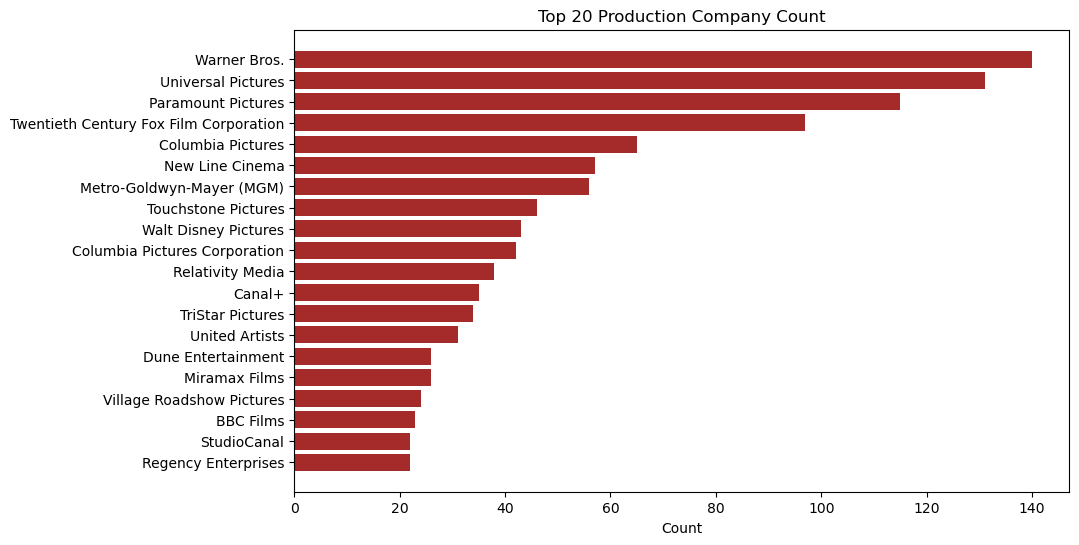

In [27]:
# Counting the frequency of production company 
list_of_companies = list(train_df['production_companies'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)

most_common_companies=Counter([i for j in list_of_companies for i in j]).most_common(20)

fig = plt.figure(figsize=(10, 6))
data=dict(most_common_companies)
names = list(data.keys())
values = list(data.values())

plt.barh(sorted(range(len(data)),reverse=True),values,tick_label=names,color='brown')
plt.xlabel('Count')
plt.title('Top 20 Production Company Count')
plt.show()

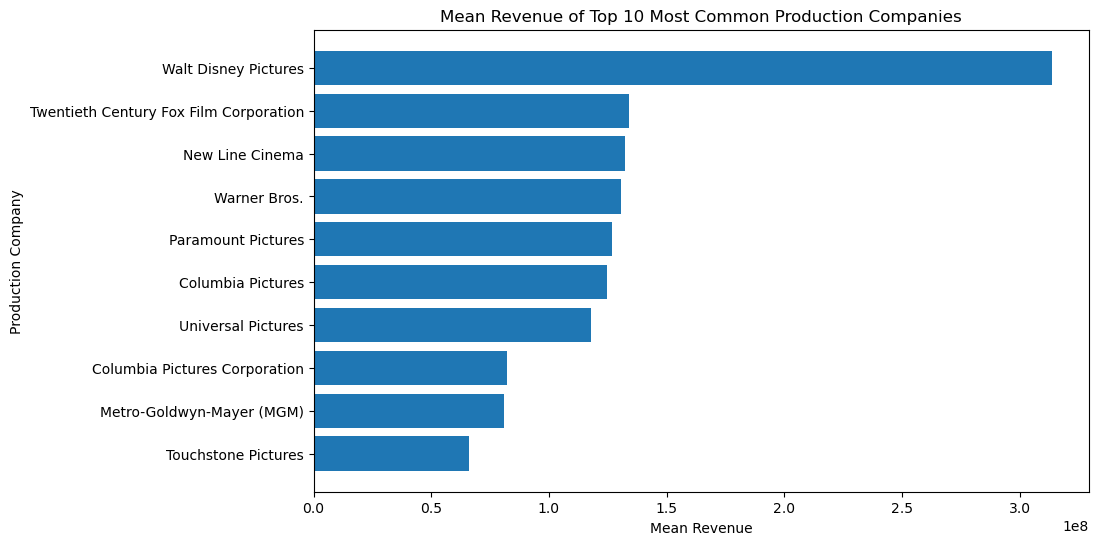

In [28]:
# Créer une liste de toutes les compagnies de production
list_of_companies = train_df['production_companies'].apply(lambda x: [i['name'] for i in x] if x != {} else []).tolist()

# Aplatir la liste et compter les occurrences de chaque compagnie
company_counter = Counter([company for sublist in list_of_companies for company in sublist])

# Prendre les 10 compagnies les plus communes
top_companies = [item[0] for item in company_counter.most_common(10)]

# Calculer le revenu moyen pour ces 10 compagnies
mean_revenues = []
for company in top_companies:
    company_data = train_df[train_df['production_companies'].apply(lambda x: any(d['name'] == company for d in x))]
    mean_revenue = company_data['revenue'].mean()
    mean_revenues.append(mean_revenue)

# Créer un DataFrame pour les résultats
mean_revenue_df = pd.DataFrame({'Company': top_companies, 'Mean_Revenue': mean_revenues})

# Trier par Mean_Revenue
mean_revenue_df = mean_revenue_df.sort_values('Mean_Revenue', ascending=True)

# Créer le graphique
plt.figure(figsize=(10, 6))
plt.barh(mean_revenue_df['Company'], mean_revenue_df['Mean_Revenue'])
plt.xlabel('Mean Revenue')
plt.ylabel('Production Company')
plt.title('Mean Revenue of Top 10 Most Common Production Companies')
plt.show()

In [29]:
# D'abord, créez la liste des noms de toutes les sociétés de production
list_of_companies = list(train_df['production_companies'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)

# Ensuite, ajoutez une nouvelle colonne pour le nombre de sociétés de production pour chaque film dans train_df
train_df['num_companies'] = train_df['production_companies'].apply(lambda x: len(x) if x != {} else 0)

# Créez une chaîne contenant tous les noms des sociétés de production pour chaque film dans train_df
train_df['all_production_companies'] = train_df['production_companies'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')

# Identifiez les 30 sociétés de production les plus courantes
top_companies = [m[0] for m in Counter([i for j in list_of_companies for i in j]).most_common(30)]

# Ajoutez une colonne pour chacune des 30 sociétés de production les plus courantes dans train_df
for g in top_companies:
    train_df['production_company_' + g] = train_df['all_production_companies'].apply(lambda x: 1 if g in x else 0)

# Répétez les mêmes étapes pour test_df
test_df['num_companies'] = test_df['production_companies'].apply(lambda x: len(x) if x != {} else 0)
test_df['all_production_companies'] = test_df['production_companies'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
for g in top_companies:
    test_df['production_company_' + g] = test_df['all_production_companies'].apply(lambda x: 1 if g in x else 0)

# Enfin, supprimez les colonnes désormais inutiles
train_df = train_df.drop(['production_companies', 'all_production_companies'], axis=1)
test_df = test_df.drop(['production_companies', 'all_production_companies'], axis=1)


In [30]:
for i, e in enumerate(train_df['production_countries'][:5]):
    print(i, e)

0 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
1 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
2 [{'iso_3166_1': 'QA', 'name': 'Qatar'}, {'iso_3166_1': 'GB', 'name': 'United Kingdom'}, {'iso_3166_1': 'US', 'name': 'United States of America'}]
3 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
4 [{'iso_3166_1': 'US', 'name': 'United States of America'}]


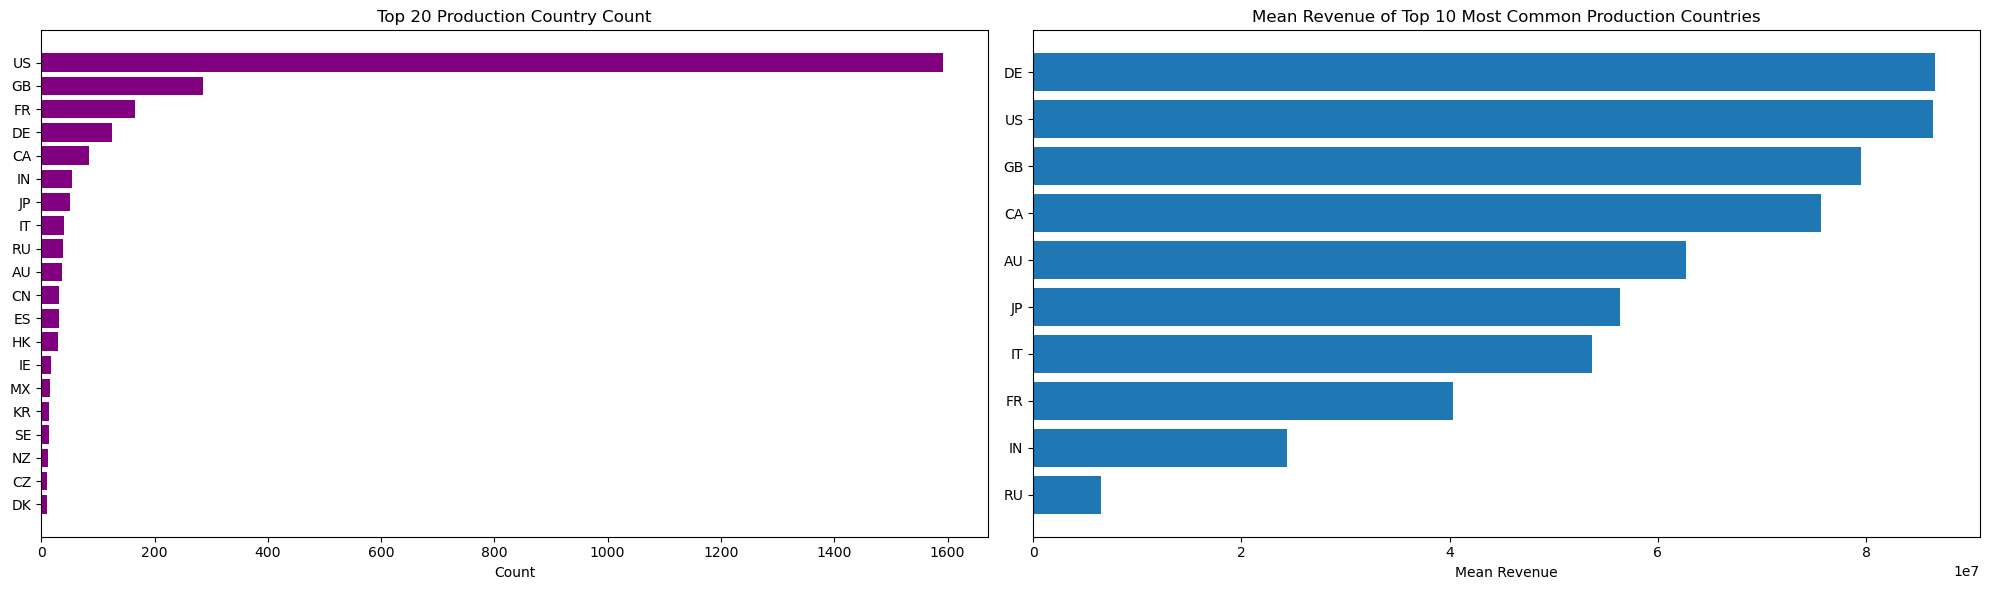

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# --- Graphique 1 : Top 20 Production Country Count ---

list_of_countries = list(train_df['production_countries'].apply(lambda x: [i['iso_3166_1'] for i in x] if x != {} else []).values)
most_common_countries = Counter([i for j in list_of_countries for i in j]).most_common(20)

data = dict(most_common_countries)
names = list(data.keys())
values = list(data.values())

axes[0].barh(sorted(range(len(data)), reverse=True), values, tick_label=names, color='purple')
axes[0].set_xlabel('Count')
axes[0].set_title('Top 20 Production Country Count')

# --- Graphique 2 : Mean Revenue of Top 10 Most Common Production Countries ---

top_countries = [item[0] for item in most_common_countries[:10]]

mean_revenues = []
for country in top_countries:
    country_data = train_df[train_df['production_countries'].apply(lambda x: any(d['iso_3166_1'] == country for d in x))]
    mean_revenue = country_data['revenue'].mean()
    mean_revenues.append(mean_revenue)

mean_revenue_df = pd.DataFrame({'Country': top_countries, 'Mean_Revenue': mean_revenues})
mean_revenue_df = mean_revenue_df.sort_values('Mean_Revenue', ascending=True)

axes[1].barh(mean_revenue_df['Country'], mean_revenue_df['Mean_Revenue'])
axes[1].set_xlabel('Mean Revenue')
axes[1].set_title('Mean Revenue of Top 10 Most Common Production Countries')

plt.tight_layout()
plt.show()


In [32]:
# Calcul du nombre de pays de production pour chaque film dans train_df
train_df['num_countries'] = train_df['production_countries'].apply(lambda x: len(x) if x != {} else 0)

# Concaténation des noms des pays de production pour chaque film dans train_df
train_df['all_countries'] = train_df['production_countries'].apply(lambda x: ' '.join(sorted([i['iso_3166_1'] for i in x])) if x != {} else '')

# Trouver les 25 pays de production les plus communs
list_of_countries = list(train_df['production_countries'].apply(lambda x: [i['iso_3166_1'] for i in x] if x != {} else []).values)
top_countries = [m[0] for m in Counter([i for j in list_of_countries for i in j]).most_common(25)]

# Création de variables "dummy" pour chaque pays commun dans train_df
for g in top_countries:
    train_df['production_country_' + g] = train_df['all_countries'].apply(lambda x: 1 if g in x else 0)

# Répéter les étapes pour test_df
test_df['num_countries'] = test_df['production_countries'].apply(lambda x: len(x) if x != {} else 0)
test_df['all_countries'] = test_df['production_countries'].apply(lambda x: ' '.join(sorted([i['iso_3166_1'] for i in x])) if x != {} else '')

for g in top_countries:
    test_df['production_country_' + g] = test_df['all_countries'].apply(lambda x: 1 if g in x else 0)

# Suppression des colonnes originales pour éviter la redondance
train_df = train_df.drop(['production_countries', 'all_countries'], axis=1)
test_df = test_df.drop(['production_countries', 'all_countries'], axis=1)


In [33]:
train_df.head()

,id,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,release_year,release_month,release_day,release_dow,collection_name,has_collection,Mystery,Thriller,Western,Documentary,War,Horror,Foreign,Drama,Adventure,Science Fiction,Action,Romance,Animation,Crime,Comedy,TV Movie,Family,Fantasy,History,Music,num_companies,production_company_Warner Bros.,production_company_Universal Pictures,production_company_Paramount Pictures,production_company_Twentieth Century Fox Film Corporation,production_company_Columbia Pictures,production_company_New Line Cinema,production_company_Metro-Goldwyn-Mayer (MGM),production_company_Touchstone Pictures,production_company_Walt Disney Pictures,production_company_Columbia Pictures Corporation,production_company_Relativity Media,production_company_Canal+,production_company_TriStar Pictures,production_company_United Artists,production_company_Dune Entertainment,production_company_Miramax Films,production_company_Village Roadshow Pictures,production_company_BBC Films,production_company_StudioCanal,production_company_Regency Enterprises,production_company_Fox Searchlight Pictures,production_company_Working Title Films,production_company_Lionsgate,production_company_Amblin Entertainment,production_company_DreamWorks SKG,production_company_Dimension Films,production_company_Summit Entertainment,production_company_Film4,production_company_Morgan Creek Productions,production_company_Hollywood Pictures,num_countries,production_country_US,production_country_GB,production_country_FR,production_country_DE,production_country_CA,production_country_IN,production_country_JP,production_country_IT,production_country_RU,production_country_AU,production_country_CN,production_country_ES,production_country_HK,production_country_IE,production_country_MX,production_country_KR,production_country_SE,production_country_NZ,production_country_CZ,production_country_DK,production_country_NL,production_country_BE,production_country_BR,production_country_HU,production_country_ZA
408,409,10000000,http://www.billandted.org/,tt0096928,en,Bill & Ted's Excellent Adventure,"In the small town of San Dimas, a few miles aw...",15.109261,/b2yKJ1STPklVSRtso2Tg4TPXK7u.jpg,603676800000000000,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,History is about to be rewritten by two guys w...,Bill & Ted's Excellent Adventure,"[{'id': 931, 'name': 'jealousy'}, {'id': 1743,...","[{'cast_id': 1, 'character': 'Ted Logan', 'cre...","[{'credit_id': '52fe4308c3a36847f8035623', 'de...",40485039,1989,2,17,4,Bill & Ted's Most Excellent Collection,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
760,761,6500000,NaN,tt0427944,en,Thank You for Smoking,The chief spokesperson and lobbyist Nick Naylo...,9.369527,/v8PKsbAGIvAhKbbRUjdQ3jgFD2S.jpg,1125878400000000000,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Tobacco lobbyist Nick Naylor is trying to SAVE...,Thank You for Smoking,"[{'id': 494, 'name': 'father son relationship'...","[{'cast_id': 23, 'character': 'Nick Naylor', '...","[{'credit_id': '5671ad939251416374002bde', 'de...",24793509,2005,9,5,0,No Collection,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1546,1547,0,NaN,tt2032557,en,The Reluctant Fundamentalist,"In New York, a Pakistani native finds that his...",6.231928,/h8GW6hvvmzrKKZbdB59b6ome5ki.jpg,1363478400000000000,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Terror has two faces.,The Reluctant Fundamentalist,"[{'id': 242, 'name': 'new york'}, {'id': 321, ...","[{'cast_id': 7, 'character': 'Changez', 'credi...","[{'credit_id': '52fe4a6ac3a368484e151e79', 'de...",519535,2013,3,17,6,No Collection,0,0,1,0,0,0,0,0,0,0,0,0,0

In [34]:
for i, e in enumerate(train['spoken_languages'][:5]):
    print(i, e)

0 [{'iso_639_1': 'en', 'name': 'English'}]
1 [{'iso_639_1': 'en', 'name': 'English'}]
2 [{'iso_639_1': 'en', 'name': 'English'}]
3 [{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'hi', 'name': 'हिन्दी'}]
4 [{'iso_639_1': 'ko', 'name': '한국어/조선말'}]


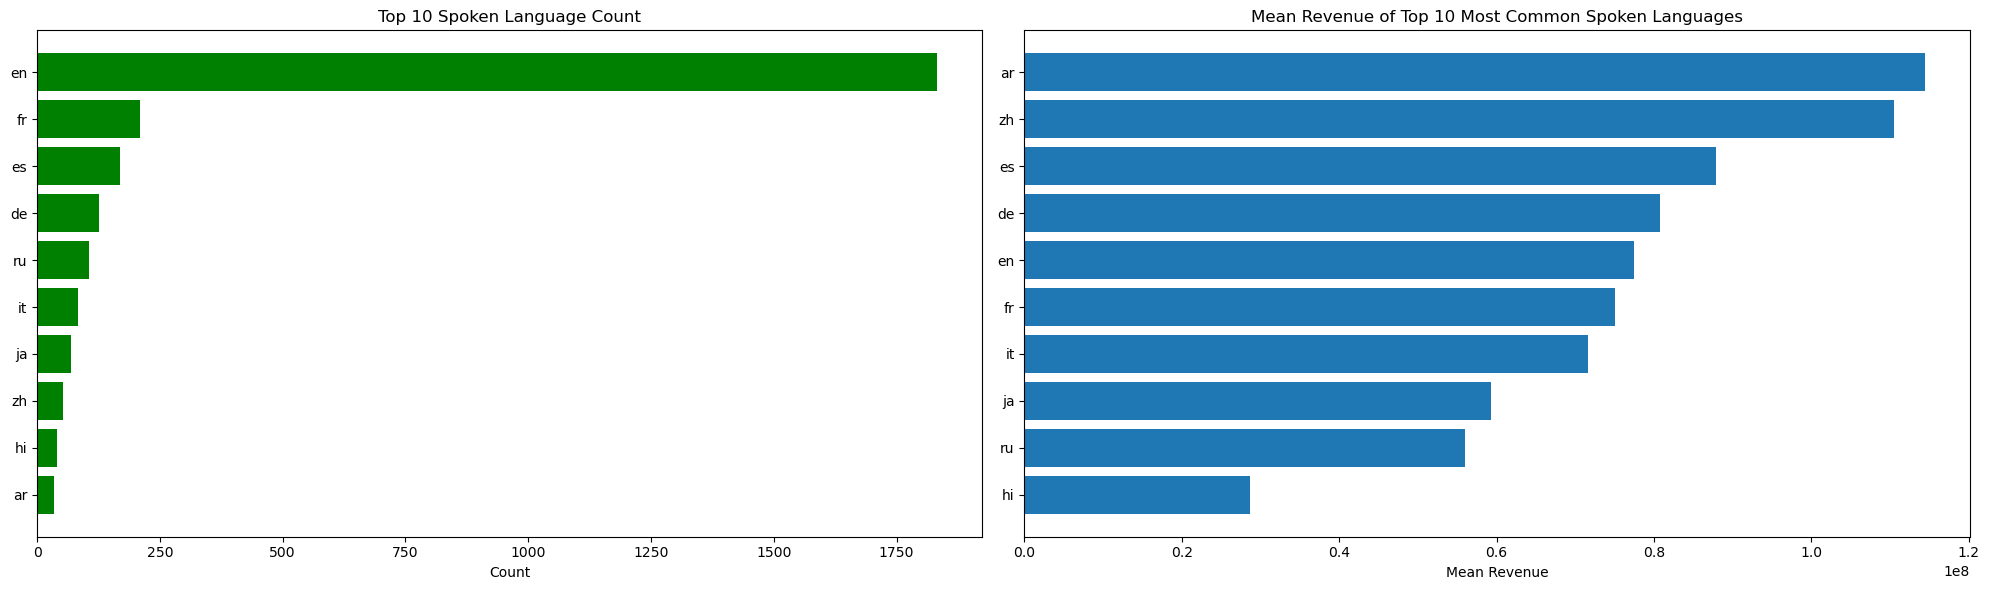

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# --- Graphique 1 : Top 10 Spoken Language Count ---

list_of_languages = list(train_df['spoken_languages'].apply(lambda x: [i['iso_639_1'] for i in x] if x != {} else []).values)
most_common_languages = Counter([i for j in list_of_languages for i in j]).most_common(10)

data = dict(most_common_languages)
names = list(data.keys())
values = list(data.values())

axes[0].barh(sorted(range(len(data)), reverse=True), values, tick_label=names, color='green')
axes[0].set_xlabel('Count')
axes[0].set_title('Top 10 Spoken Language Count')

# --- Graphique 2 : Mean Revenue of Top 10 Most Common Spoken Languages ---

top_languages = [item[0] for item in most_common_languages[:10]]

mean_revenues = []
for language in top_languages:
    language_data = train_df[train_df['spoken_languages'].apply(lambda x: any(d['iso_639_1'] == language for d in x))]
    mean_revenue = language_data['revenue'].mean()
    mean_revenues.append(mean_revenue)

mean_revenue_df = pd.DataFrame({'Language': top_languages, 'Mean_Revenue': mean_revenues})
mean_revenue_df = mean_revenue_df.sort_values('Mean_Revenue', ascending=True)

axes[1].barh(mean_revenue_df['Language'], mean_revenue_df['Mean_Revenue'])
axes[1].set_xlabel('Mean Revenue')
axes[1].set_title('Mean Revenue of Top 10 Most Common Spoken Languages')

plt.tight_layout()
plt.show()


In [36]:
# Calcul du nombre de langues parlées pour chaque film dans train_df
train_df['num_languages'] = train_df['spoken_languages'].apply(lambda x: len(x) if x != {} else 0)

# Concaténation des codes de langues pour chaque film dans train_df
train_df['all_languages'] = train_df['spoken_languages'].apply(lambda x: ' '.join(sorted([i['iso_639_1'] for i in x])) if x != {} else '')

# Trouver les 30 langues les plus courantes
top_languages = [m[0] for m in Counter([i for j in list_of_languages for i in j]).most_common(30)]

# Création de nouvelles colonnes pour chaque langue parmi les plus courantes dans train_df
for g in top_languages:
    train_df['language_' + g] = train_df['all_languages'].apply(lambda x: 1 if g in x else 0)

# Faire la même chose pour test_df
test_df['num_languages'] = test_df['spoken_languages'].apply(lambda x: len(x) if x != {} else 0)
test_df['all_languages'] = test_df['spoken_languages'].apply(lambda x: ' '.join(sorted([i['iso_639_1'] for i in x])) if x != {} else '')

for g in top_languages:
    test_df['language_' + g] = test_df['all_languages'].apply(lambda x: 1 if g in x else 0)

# Supprimer les colonnes originales pour alléger le DataFrame
train_df = train_df.drop(['spoken_languages', 'all_languages'], axis=1)
test_df = test_df.drop(['spoken_languages', 'all_languages'], axis=1)

train_df.head()

/tmp/ipykernel_32/3464951194.py:19: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_32/3464951194.py:19: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_32/3464951194.py:19: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_32/3464951194.py:19: PerformanceWarning:

,id,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,release_date,runtime,status,tagline,title,Keywords,cast,crew,revenue,release_year,release_month,release_day,release_dow,collection_name,has_collection,Mystery,Thriller,Western,Documentary,War,Horror,Foreign,Drama,Adventure,Science Fiction,Action,Romance,Animation,Crime,Comedy,TV Movie,Family,Fantasy,History,Music,num_companies,production_company_Warner Bros.,production_company_Universal Pictures,production_company_Paramount Pictures,production_company_Twentieth Century Fox Film Corporation,production_company_Columbia Pictures,production_company_New Line Cinema,production_company_Metro-Goldwyn-Mayer (MGM),production_company_Touchstone Pictures,production_company_Walt Disney Pictures,production_company_Columbia Pictures Corporation,production_company_Relativity Media,production_company_Canal+,production_company_TriStar Pictures,production_company_United Artists,production_company_Dune Entertainment,production_company_Miramax Films,production_company_Village Roadshow Pictures,production_company_BBC Films,production_company_StudioCanal,production_company_Regency Enterprises,production_company_Fox Searchlight Pictures,production_company_Working Title Films,production_company_Lionsgate,production_company_Amblin Entertainment,production_company_DreamWorks SKG,production_company_Dimension Films,production_company_Summit Entertainment,production_company_Film4,production_company_Morgan Creek Productions,production_company_Hollywood Pictures,num_countries,production_country_US,production_country_GB,production_country_FR,production_country_DE,production_country_CA,production_country_IN,production_country_JP,production_country_IT,production_country_RU,production_country_AU,production_country_CN,production_country_ES,production_country_HK,production_country_IE,production_country_MX,production_country_KR,production_country_SE,production_country_NZ,production_country_CZ,production_country_DK,production_country_NL,production_country_BE,production_country_BR,production_country_HU,production_country_ZA,num_languages,language_en,language_fr,language_es,language_de,language_ru,language_it,language_ja,language_zh,language_hi,language_ar,language_pt,language_ko,language_cn,language_pl,language_th,language_hu,language_sv,language_ta,language_la,language_cs,language_he,language_el,language_da,language_fa,language_tr,language_ur,language_no,language_nl,language_sw,language_vi
408,409,10000000,http://www.billandted.org/,tt0096928,en,Bill & Ted's Excellent Adventure,"In the small town of San Dimas, a few miles aw...",15.109261,/b2yKJ1STPklVSRtso2Tg4TPXK7u.jpg,603676800000000000,90.0,Released,History is about to be rewritten by two guys w...,Bill & Ted's Excellent Adventure,"[{'id': 931, 'name': 'jealousy'}, {'id': 1743,...","[{'cast_id': 1, 'character': 'Ted Logan', 'cre...","[{'credit_id': '52fe4308c3a36847f8035623', 'de...",40485039,1989,2,17,4,Bill & Ted's Most Excellent Collection,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
760,761,6500000,NaN,tt0427944,en,Thank You for Smoking,The chief spokesperson and lobbyist Nick Naylo...,9.369527,/v8PKsbAGIvAhKbbRUjdQ3jgFD2S.jpg,1125878400000000000,92.0,Released,Tobacco lobbyist Nick Naylor is trying to SAVE...,Thank You for Smoking,"[{'id': 494, 'name': 'father son relationship'...","[{'cast_id': 23, 'character': 'Nick Naylor', '...","[{'credit_id': '5671ad939251416374002bde', 'de...",24793509,2005,9,5,0,No Collection,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1546,1547,0,NaN,tt2032557,en,The Reluctant Fundamentalist,"In New York, a Pakistani native finds that his...",6.231928

In [37]:
for i, e in enumerate(train_df['Keywords'][:5]):
    print(i, e)

0 [{'id': 931, 'name': 'jealousy'}, {'id': 1743, 'name': 'journey in the past'}, {'id': 2842, 'name': 'sigmund freud'}, {'id': 4379, 'name': 'time travel'}, {'id': 5540, 'name': 'heavy metal'}, {'id': 5671, 'name': 'socrates'}, {'id': 5672, 'name': 'billy the kid'}, {'id': 5674, 'name': 'school presentation'}, {'id': 5678, 'name': 'rhinoceros'}, {'id': 5679, 'name': 'phone booth'}, {'id': 5680, 'name': 'world peace'}, {'id': 6162, 'name': 'past'}, {'id': 9682, 'name': 'history'}, {'id': 10875, 'name': 'metal'}, {'id': 12392, 'name': 'best friend'}, {'id': 220265, 'name': 'napoleon bonaparte'}]
1 [{'id': 494, 'name': 'father son relationship'}, {'id': 592, 'name': 'capitalism'}, {'id': 818, 'name': 'based on novel'}, {'id': 919, 'name': 'smoking'}, {'id': 2251, 'name': 'lie'}, {'id': 3170, 'name': 'cigarette'}, {'id': 3664, 'name': 'research'}, {'id': 3703, 'name': 'law'}, {'id': 3721, 'name': 'health'}, {'id': 3983, 'name': 'marketing'}, {'id': 6078, 'name': 'politics'}, {'id': 6083, '

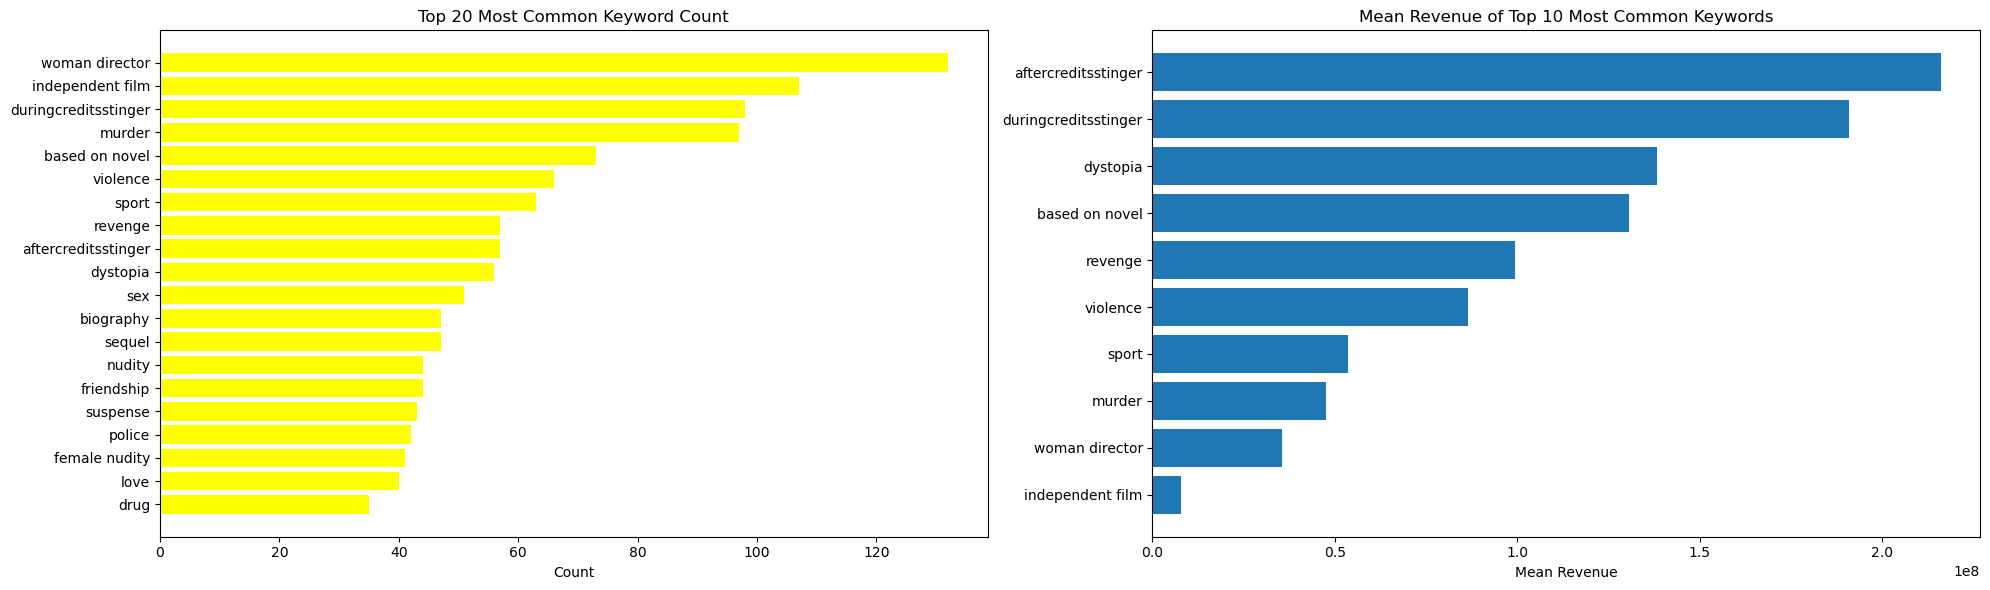

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# --- Graphique 1 : Top 20 Most Common Keyword Count ---

list_of_keywords = list(train_df['Keywords'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
most_common_keywords = Counter([i for j in list_of_keywords for i in j]).most_common(20)

data = dict(most_common_keywords)
names = list(data.keys())
values = list(data.values())

axes[0].barh(sorted(range(len(data)), reverse=True), values, tick_label=names, color='yellow')
axes[0].set_xlabel('Count')
axes[0].set_title('Top 20 Most Common Keyword Count')

# --- Graphique 2 : Mean Revenue of Top 10 Most Common Keywords ---

top_keywords = [item[0] for item in most_common_keywords[:10]]

mean_revenues = []
for keyword in top_keywords:
    keyword_data = train_df[train_df['Keywords'].apply(lambda x: any(d['name'] == keyword for d in x))]
    mean_revenue = keyword_data['revenue'].mean()
    mean_revenues.append(mean_revenue)

mean_revenue_df = pd.DataFrame({'Keyword': top_keywords, 'Mean_Revenue': mean_revenues})
mean_revenue_df = mean_revenue_df.sort_values('Mean_Revenue', ascending=True)

axes[1].barh(mean_revenue_df['Keyword'], mean_revenue_df['Mean_Revenue'])
axes[1].set_xlabel('Mean Revenue')
axes[1].set_title('Mean Revenue of Top 10 Most Common Keywords')

plt.tight_layout()
plt.show()


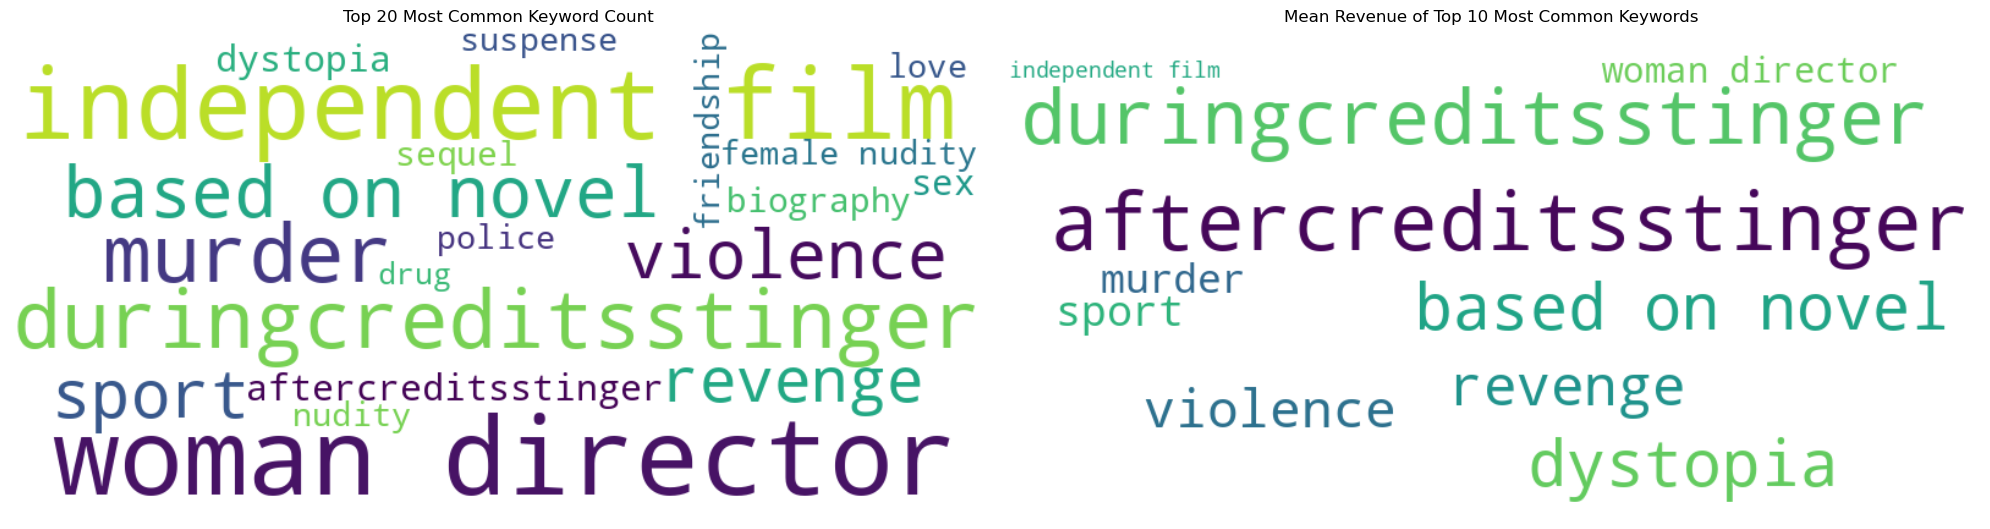

In [39]:
from wordcloud import WordCloud

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# --- WordCloud 1: Top 20 Most Common Keyword Count ---

list_of_keywords = list(train_df['Keywords'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
most_common_keywords = Counter([i for j in list_of_keywords for i in j]).most_common(20)
wordcloud1 = WordCloud(width=800, height=400, background_color='white', max_words=20).generate_from_frequencies(dict(most_common_keywords))

axes[0].imshow(wordcloud1, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title('Top 20 Most Common Keyword Count')

# --- WordCloud 2: Mean Revenue of Top 10 Most Common Keywords ---

top_keywords = [item[0] for item in most_common_keywords[:10]]

mean_revenues = []
for keyword in top_keywords:
    keyword_data = train_df[train_df['Keywords'].apply(lambda x: any(d['name'] == keyword for d in x))]
    mean_revenue = keyword_data['revenue'].mean()
    mean_revenues.append((keyword, mean_revenue))

wordcloud2 = WordCloud(width=800, height=400, background_color='white', max_words=10).generate_from_frequencies(dict(mean_revenues))

axes[1].imshow(wordcloud2, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('Mean Revenue of Top 10 Most Common Keywords')

plt.tight_layout()
plt.show()


In [40]:
# Calcul du nombre de mots-clés pour chaque film dans le train_df
train_df['num_Keywords'] = train_df['Keywords'].apply(lambda x: len(x) if x != {} else 0)

# Création d'une chaîne de caractères contenant tous les mots-clés pour chaque film dans le train_df
train_df['all_Keywords'] = train_df['Keywords'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')

# Identification des 30 mots-clés les plus courants dans le train_df
top_keywords = [m[0] for m in Counter([i for j in list_of_keywords for i in j]).most_common(30)]

# Création de nouvelles colonnes dans le train_df pour les 30 mots-clés les plus courants
for g in top_keywords:
    train_df['keyword_' + g] = train_df['all_Keywords'].apply(lambda x: 1 if g in x else 0)

# Répétez les mêmes étapes pour le test_df
test_df['num_Keywords'] = test_df['Keywords'].apply(lambda x: len(x) if x != {} else 0)
test_df['all_Keywords'] = test_df['Keywords'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
for g in top_keywords:
    test_df['keyword_' + g] = test_df['all_Keywords'].apply(lambda x: 1 if g in x else 0)

# Suppression des colonnes inutiles
train_df = train_df.drop(['Keywords', 'all_Keywords'], axis=1)
test_df = test_df.drop(['Keywords', 'all_Keywords'], axis=1)


/tmp/ipykernel_32/1230943488.py:15: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_32/1230943488.py:16: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_32/1230943488.py:18: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_32/1230943488.py:18: PerformanceWarning:

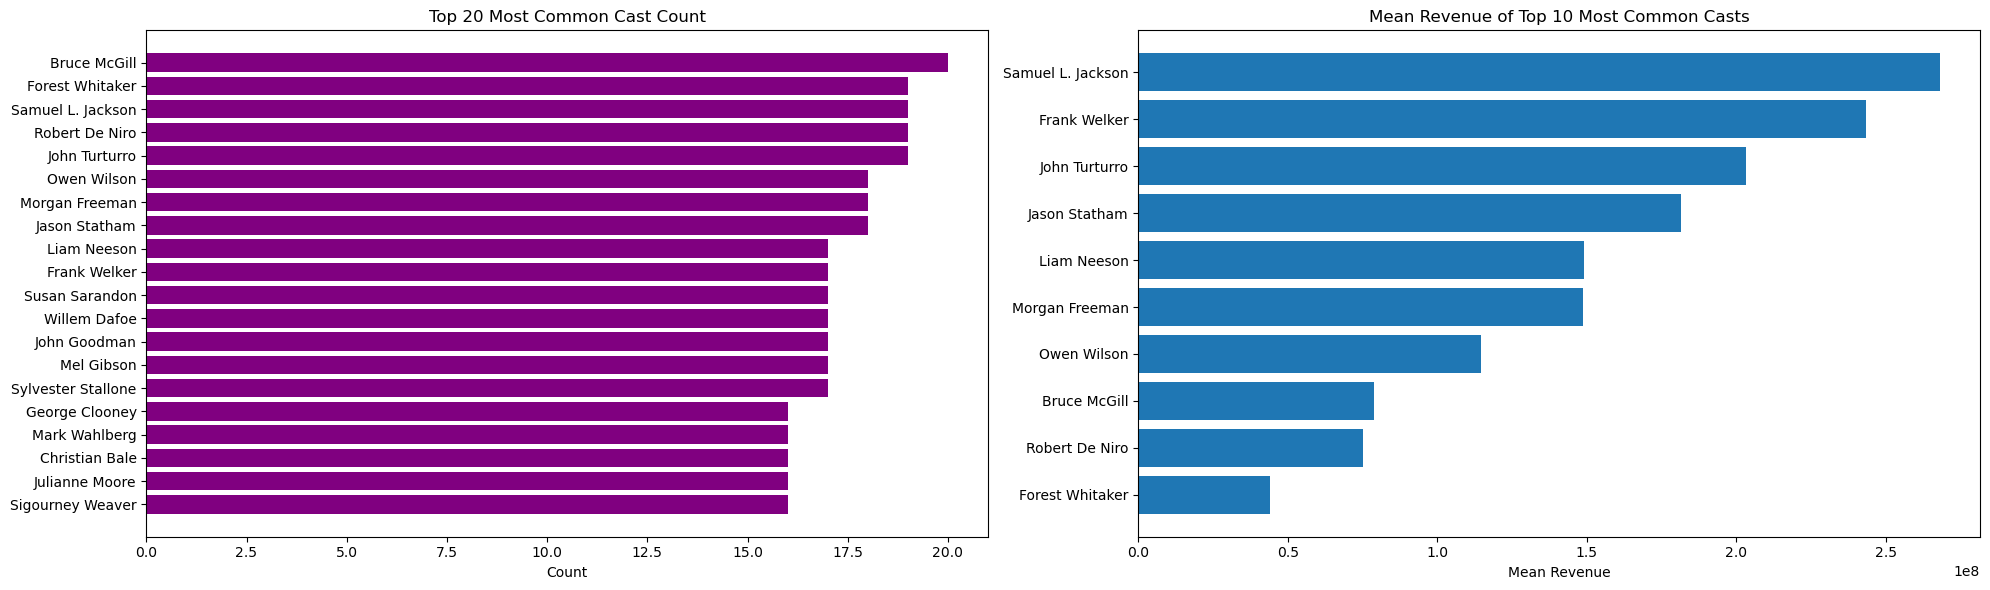

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# --- Graphique 1 : Top 20 Most Common Cast Count ---

# Supposons que 'cast' est une colonne dans train_df qui contient des listes de dictionnaires. 
# Chaque dictionnaire a une clé 'name' qui contient le nom de l'acteur.
list_of_casts = list(train_df['cast'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
most_common_casts = Counter([i for j in list_of_casts for i in j]).most_common(20)

data = dict(most_common_casts)
names = list(data.keys())
values = list(data.values())

axes[0].barh(sorted(range(len(data)), reverse=True), values, tick_label=names, color='purple')
axes[0].set_xlabel('Count')
axes[0].set_title('Top 20 Most Common Cast Count')

# --- Graphique 2 : Mean Revenue of Top 10 Most Common Casts ---

top_casts = [item[0] for item in most_common_casts[:10]]

mean_revenues = []
for cast in top_casts:
    cast_data = train_df[train_df['cast'].apply(lambda x: any(d['name'] == cast for d in x))]
    mean_revenue = cast_data['revenue'].mean()
    mean_revenues.append(mean_revenue)

mean_revenue_df = pd.DataFrame({'Cast': top_casts, 'Mean_Revenue': mean_revenues})
mean_revenue_df = mean_revenue_df.sort_values('Mean_Revenue', ascending=True)

axes[1].barh(mean_revenue_df['Cast'], mean_revenue_df['Mean_Revenue'])
axes[1].set_xlabel('Mean Revenue')
axes[1].set_title('Mean Revenue of Top 10 Most Common Casts')

plt.tight_layout()
plt.show()


In [42]:
# Pour train_df
list_of_cast_names = list(train_df['cast'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
train_df['num_cast'] = train_df['cast'].apply(lambda x: len(x) if x != {} else 0)
train_df['all_cast'] = train_df['cast'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
top_cast_names = [m[0] for m in Counter([i for j in list_of_cast_names for i in j]).most_common(30)]

for g in top_cast_names:
    train_df['cast_name_' + g] = train_df['all_cast'].apply(lambda x: 1 if g in x else 0)

list_of_cast_genders = list(train_df['cast'].apply(lambda x: [i['gender'] for i in x] if x != {} else []).values)
list_of_cast_characters = list(train_df['cast'].apply(lambda x: [i['character'] for i in x] if x != {} else []).values)

train_df['genders_0'] = train_df['cast'].apply(lambda x: sum([1 for i in x if i['gender'] == 0]))
train_df['genders_1'] = train_df['cast'].apply(lambda x: sum([1 for i in x if i['gender'] == 1]))
train_df['genders_2'] = train_df['cast'].apply(lambda x: sum([1 for i in x if i['gender'] == 2]))

top_cast_characters = [m[0] for m in Counter([i for j in list_of_cast_characters for i in j]).most_common(15)]
for g in top_cast_characters:
    train_df['cast_character_' + g] = train_df['cast'].apply(lambda x: 1 if g in str(x) else 0)

train_df = train_df.drop(['cast'], axis=1)

# Pour test_df
test_df['num_cast'] = test_df['cast'].apply(lambda x: len(x) if x != {} else 0)
test_df['all_cast'] = test_df['cast'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')

for g in top_cast_names:
    test_df['cast_name_' + g] = test_df['all_cast'].apply(lambda x: 1 if g in x else 0)

test_df['genders_0'] = test_df['cast'].apply(lambda x: sum([1 for i in x if i['gender'] == 0]))
test_df['genders_1'] = test_df['cast'].apply(lambda x: sum([1 for i in x if i['gender'] == 1]))
test_df['genders_2'] = test_df['cast'].apply(lambda x: sum([1 for i in x if i['gender'] == 2]))

for g in top_cast_characters:
    test_df['cast_character_' + g] = test_df['cast'].apply(lambda x: 1 if g in str(x) else 0)

test_df = test_df.drop(['cast'], axis=1)


/tmp/ipykernel_32/1385948943.py:24: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_32/1385948943.py:25: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_32/1385948943.py:28: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_32/1385948943.py:28: PerformanceWarning:

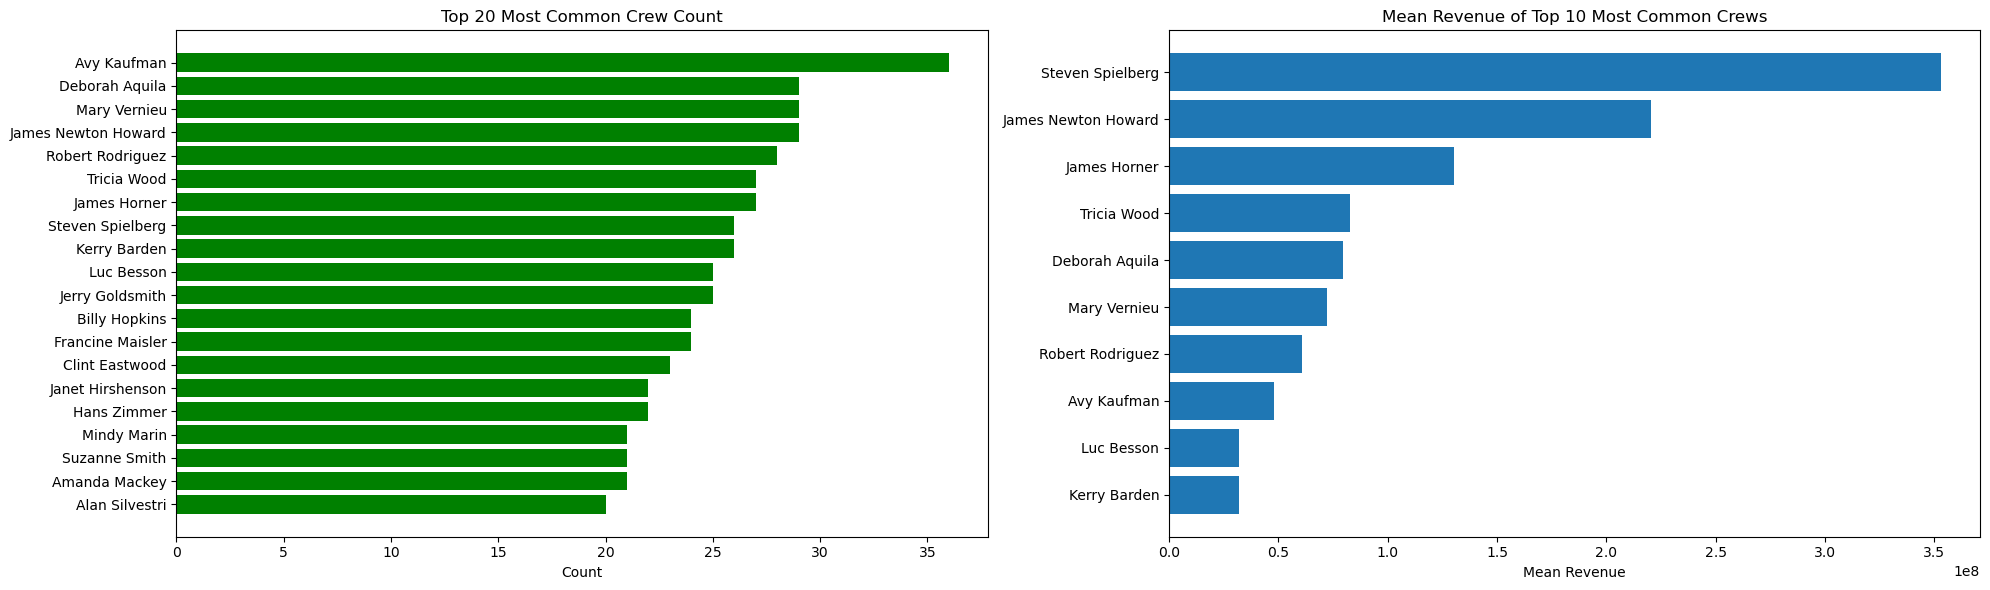

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# --- Graphique 1 : Top 20 Most Common Crew Count ---

# Supposons que 'crew' est une colonne dans train_df qui contient des listes de dictionnaires.
# Chaque dictionnaire a une clé 'name' qui contient le nom du membre de l'équipe.
list_of_crews = list(train_df['crew'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
most_common_crews = Counter([i for j in list_of_crews for i in j]).most_common(20)

data = dict(most_common_crews)
names = list(data.keys())
values = list(data.values())

axes[0].barh(sorted(range(len(data)), reverse=True), values, tick_label=names, color='green')
axes[0].set_xlabel('Count')
axes[0].set_title('Top 20 Most Common Crew Count')

# --- Graphique 2 : Mean Revenue of Top 10 Most Common Crews ---

top_crews = [item[0] for item in most_common_crews[:10]]

mean_revenues = []
for crew in top_crews:
    crew_data = train_df[train_df['crew'].apply(lambda x: any(d['name'] == crew for d in x))]
    mean_revenue = crew_data['revenue'].mean()
    mean_revenues.append(mean_revenue)

mean_revenue_df = pd.DataFrame({'Crew': top_crews, 'Mean_Revenue': mean_revenues})
mean_revenue_df = mean_revenue_df.sort_values('Mean_Revenue', ascending=True)

axes[1].barh(mean_revenue_df['Crew'], mean_revenue_df['Mean_Revenue'])
axes[1].set_xlabel('Mean Revenue')
axes[1].set_title('Mean Revenue of Top 10 Most Common Crews')

plt.tight_layout()
plt.show()


In [44]:
# Consider other factors like crew jobs, gender, and department

list_of_crew_jobs = list(train_df['crew'].apply(lambda x: [i['job'] for i in x] if x != {} else []).values)
list_of_crew_genders = list(train_df['crew'].apply(lambda x: [i['gender'] for i in x] if x != {} else []).values)
list_of_crew_departments = list(train_df['crew'].apply(lambda x: [i['department'] for i in x] if x != {} else []).values)


train_df['genders_0'] = train_df['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 0]))
train_df['genders_1'] = train_df['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 1]))
train_df['genders_2'] = train_df['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 2]))
top_crew_jobs = [m[0] for m in Counter([i for j in list_of_crew_jobs for i in j]).most_common(15)]
for j in top_crew_jobs:
    train_df['jobs_' + j] = train_df['crew'].apply(lambda x: sum([1 for i in x if i['job'] == j]))
top_crew_departments = [m[0] for m in Counter([i for j in list_of_crew_departments for i in j]).most_common(15)]
for j in top_crew_departments:
    train_df['departments_' + j] = train_df['crew'].apply(lambda x: sum([1 for i in x if i['department'] == j])) 


# Do the same for test_df
test_df['genders_0'] = test_df['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 0]))
test_df['genders_1'] = test_df['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 1]))
test_df['genders_2'] = test_df['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 2]))
for j in top_crew_jobs:
    test_df['jobs_' + j] = test_df['crew'].apply(lambda x: sum([1 for i in x if i['job'] == j]))
for j in top_crew_departments:
    test_df['departments_' + j] = test_df['crew'].apply(lambda x: sum([1 for i in x if i['department'] == j])) 

train_df = train_df.drop(['crew'], axis=1)
test_df = test_df.drop(['crew'], axis=1)


/tmp/ipykernel_32/788068793.py:24: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_32/788068793.py:24: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_32/788068793.py:24: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_32/788068793.py:24: PerformanceWarning:

Da

Skew of revenue attribute: 4.4


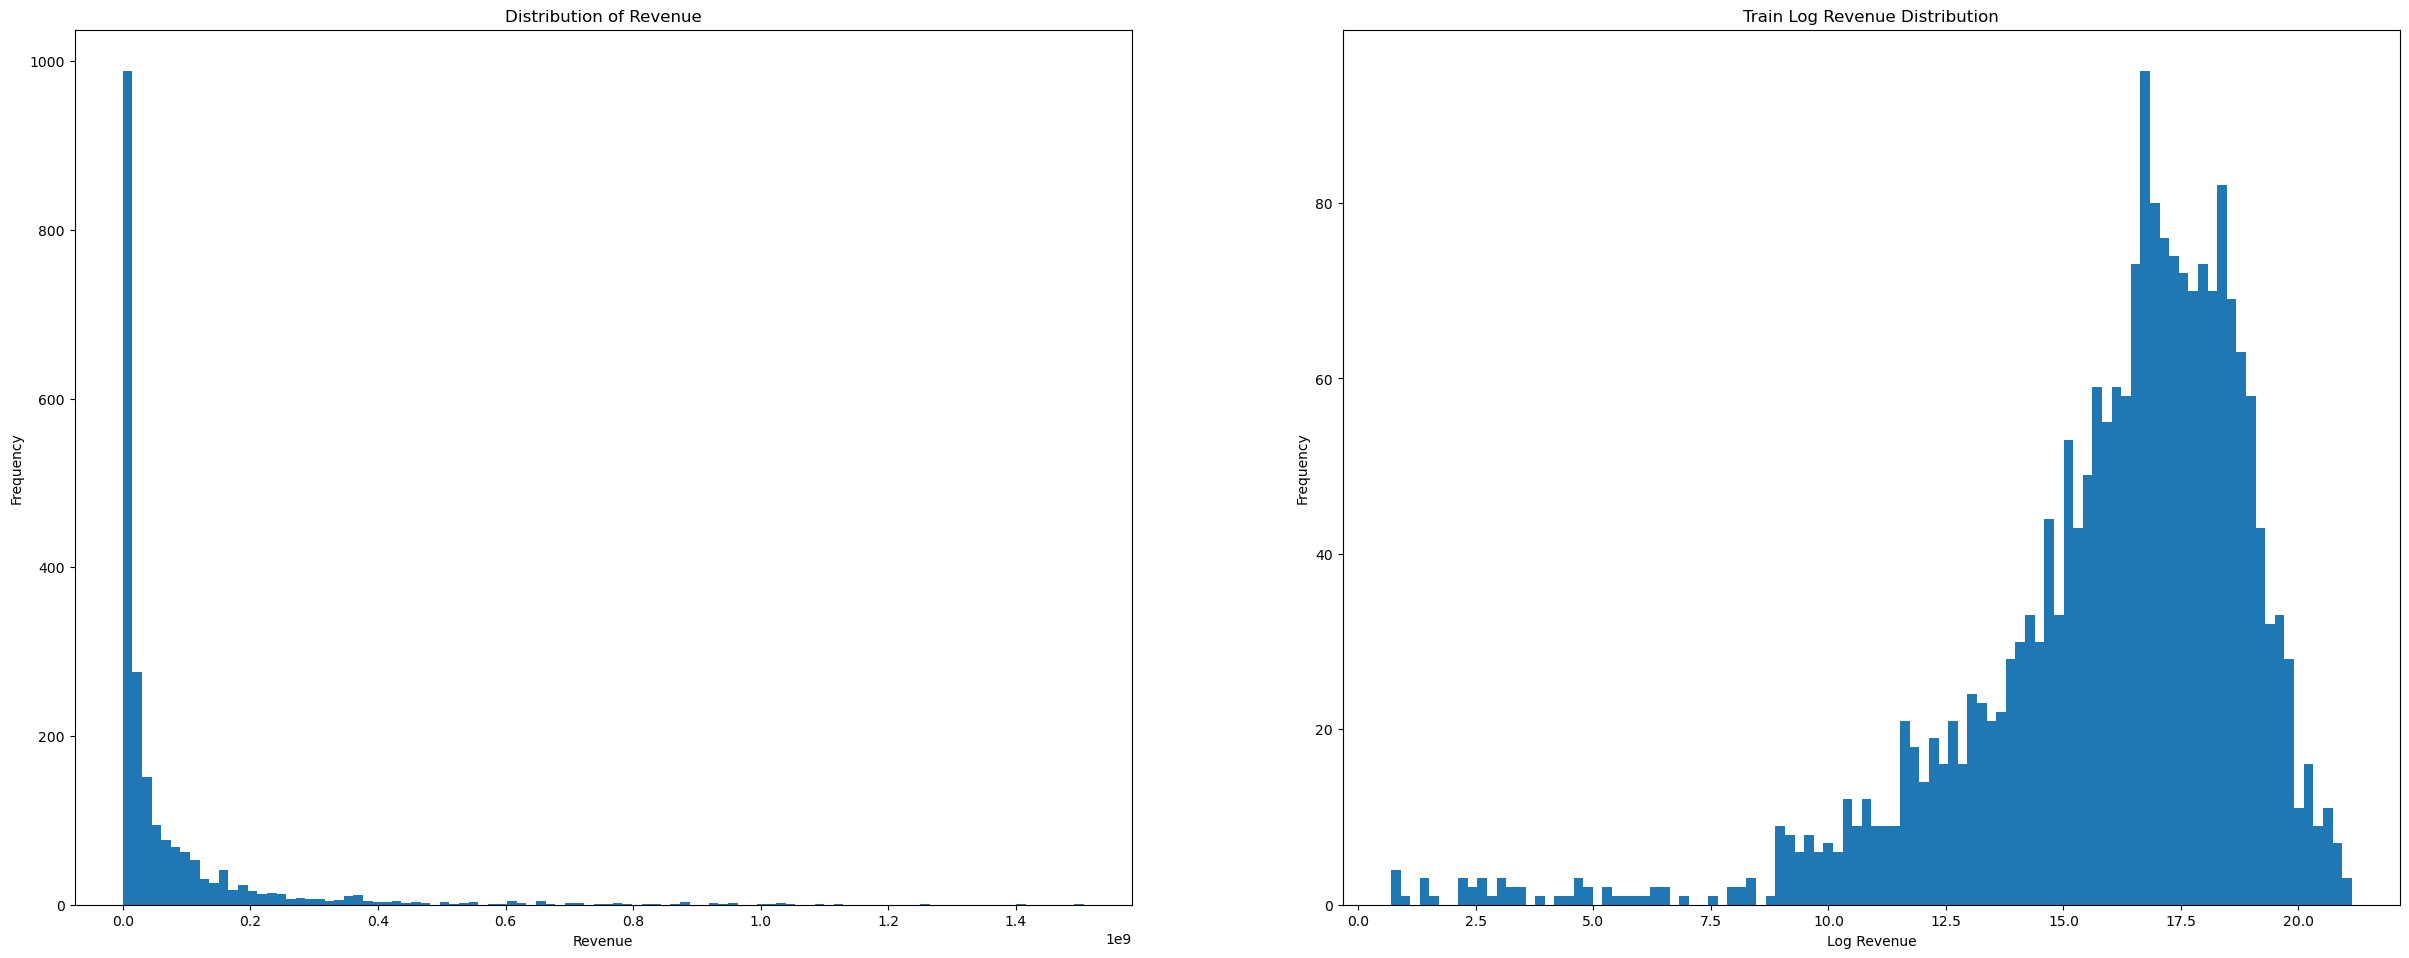

In [45]:
# Plot the distribution of the revenue

fig = plt.figure(figsize=(30, 25))

plt.subplot(221)
train_df['revenue'].plot(kind='hist',bins=100)
plt.title('Distribution of Revenue')
plt.xlabel('Revenue')

plt.subplot(222)
np.log1p(train_df['revenue']).plot(kind='hist',bins=100)
plt.title('Train Log Revenue Distribution')
plt.xlabel('Log Revenue')


print('Skew of revenue attribute: %0.1f' % skew(train_df['revenue']))

In [46]:
# Adjusting other skewed variables such as popularity and budget

print('Skew of train budget attribute: %0.1f' % skew(train_df['budget']))
print('Skew of test budget attribute: %0.1f' % skew(test_df['budget']))
print('Skew of train popularity attribute: %0.1f' % skew(train_df['popularity']))
print('Skew of test popularity attribute: %0.1f' % skew(test_df['popularity']))

Skew of train budget attribute: 3.1
Skew of test budget attribute: 2.8
Skew of train popularity attribute: 13.6
Skew of test popularity attribute: 3.9


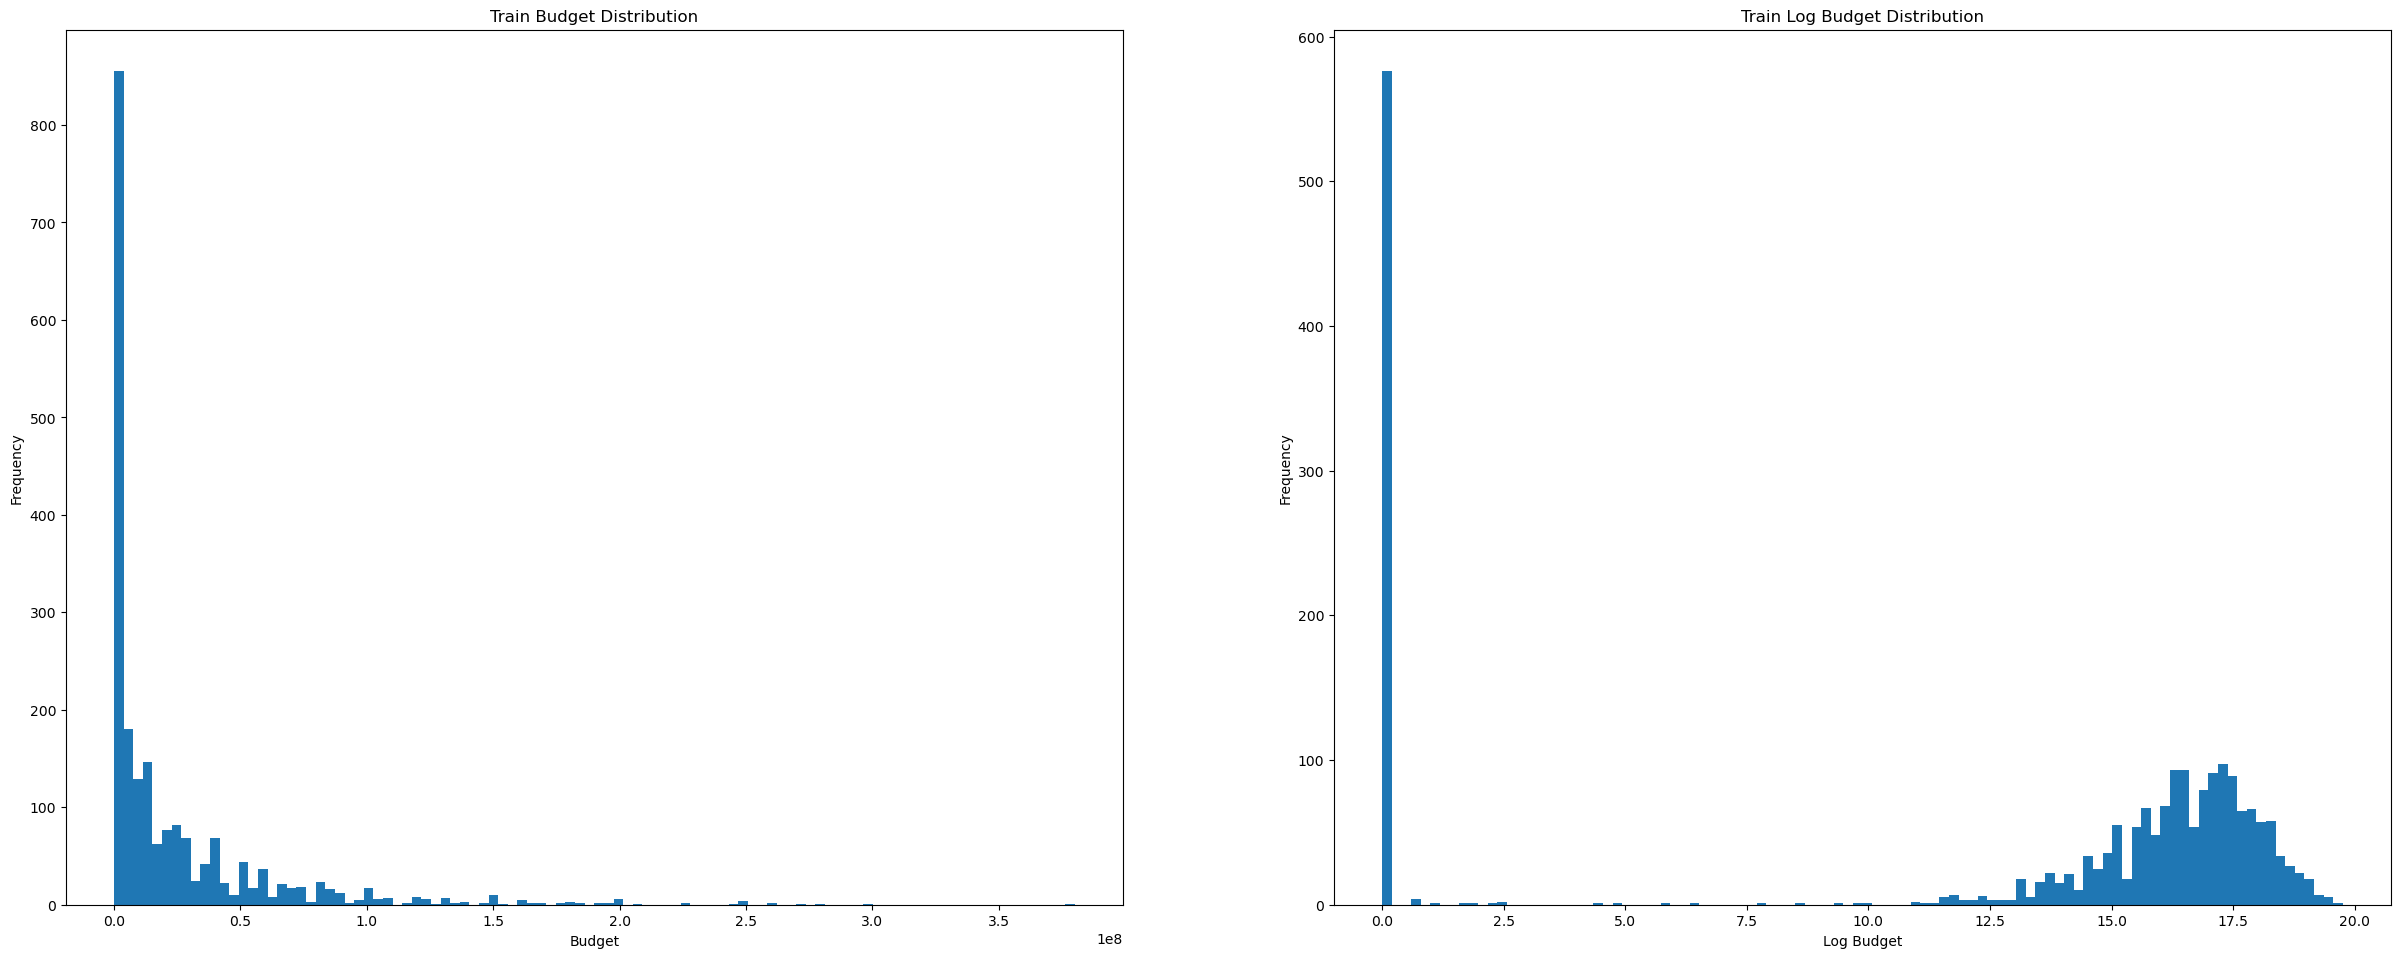

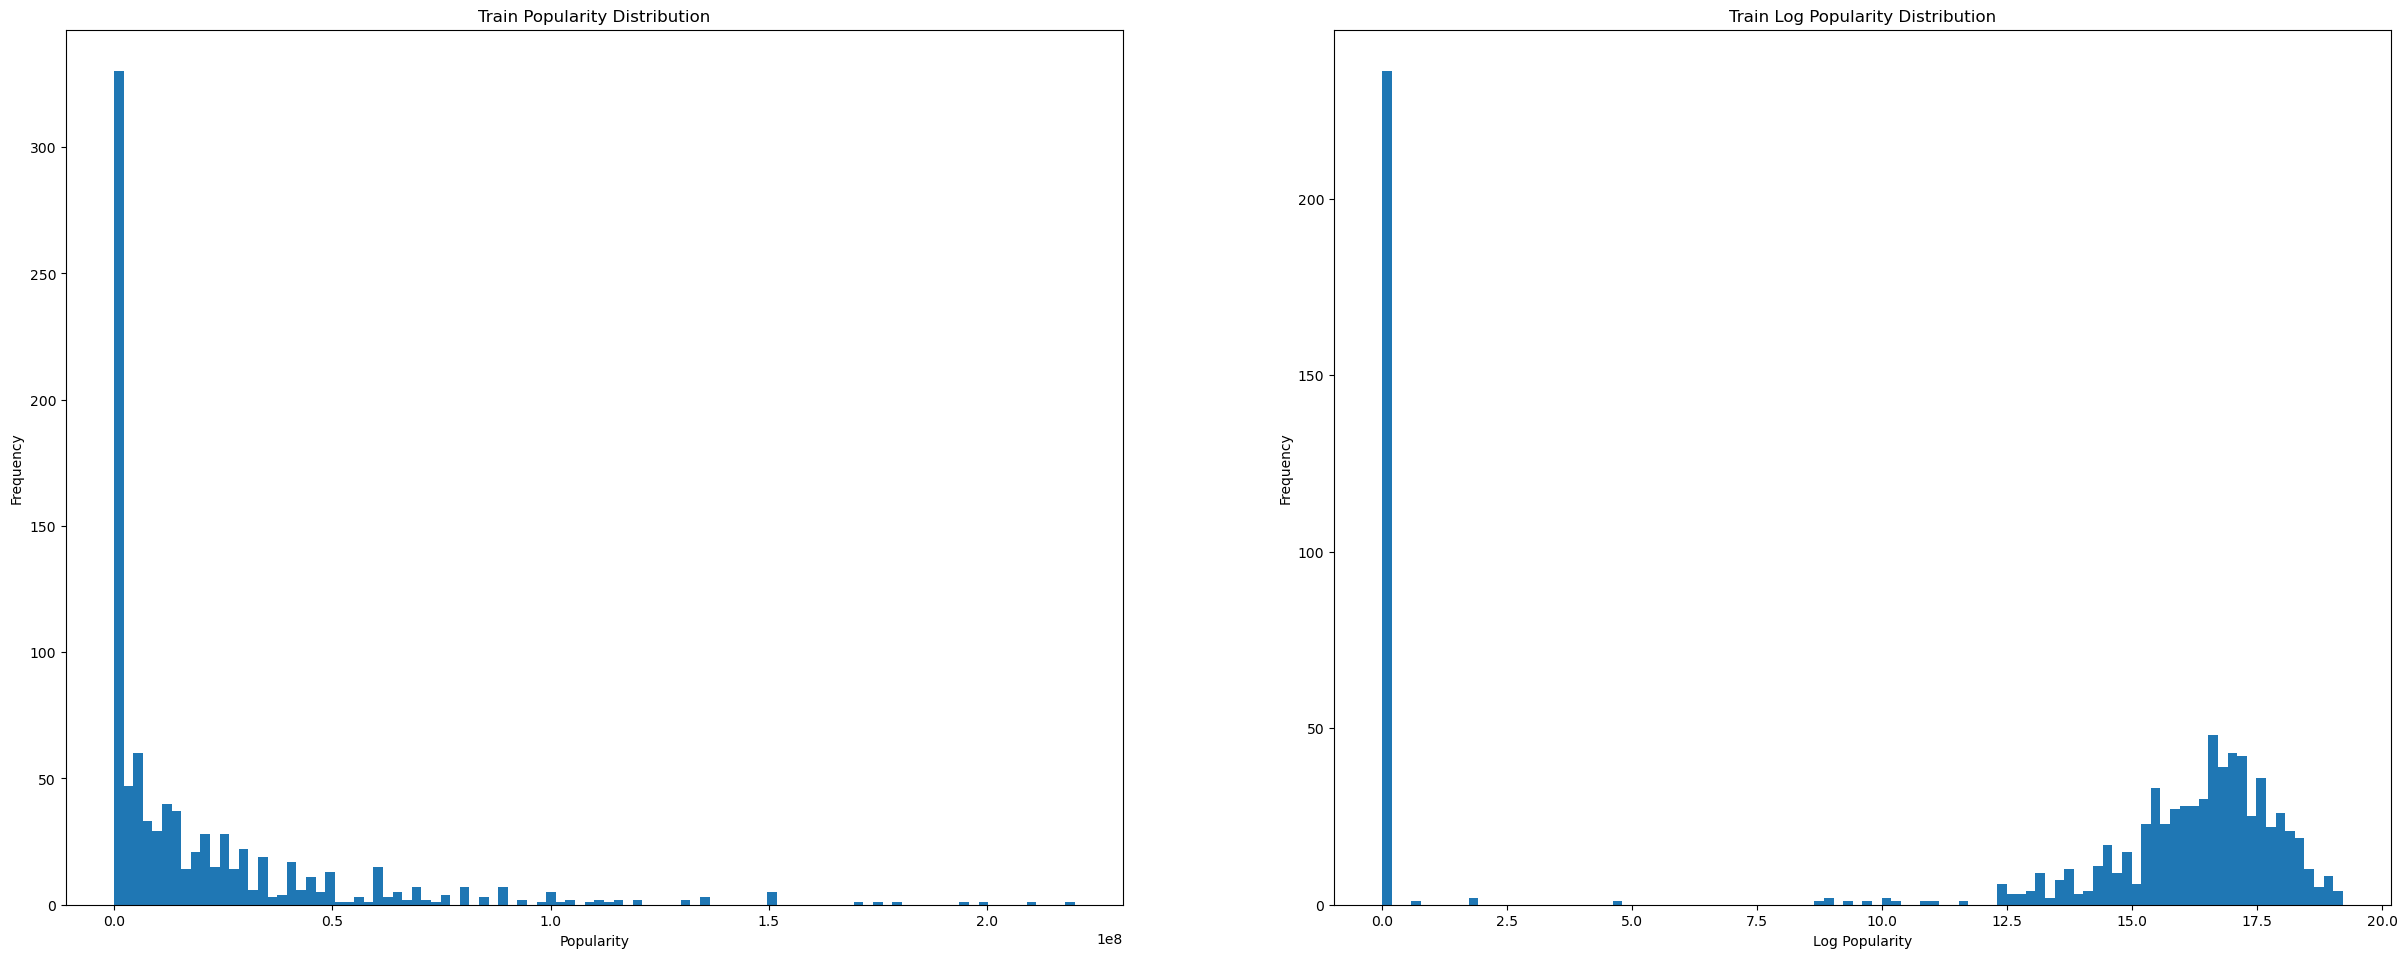

In [47]:
# Before log transformation and after log transformation for train budget and train popularity 
fig = plt.figure(figsize=(30, 25))

plt.subplot(221)
train_df['budget'].plot(kind='hist',bins=100)
plt.title('Train Budget Distribution')
plt.xlabel('Budget')

plt.subplot(222)
np.log1p(train_df['budget']).plot(kind='hist',bins=100)
plt.title('Train Log Budget Distribution')
plt.xlabel('Log Budget')

plt.show()

fig = plt.figure(figsize=(30, 25))

plt.subplot(223)
test_df['budget'].plot(kind='hist',bins=100)
plt.title('Train Popularity Distribution')
plt.xlabel('Popularity')

plt.subplot(224)
np.log1p(test_df['budget']).plot(kind='hist',bins=100)
plt.title('Train Log Popularity Distribution')
plt.xlabel('Log Popularity')
plt.show()

In [48]:
# Revising budget variable 

power_six = train_df.id[train_df.budget > 1000][train_df.revenue < 100]

for k in power_six :
    train_df.loc[train_df['id'] == k,'revenue'] =  train_df.loc[train_df['id'] == k,'revenue'] * 1000000
    
# Putting log variables for skewed data 
train_df['log_budget']=np.log1p(train_df['budget'])
test_df['log_budget']=np.log1p(test_df['budget'])
train_df['log_popularity']=np.log1p(train_df['popularity'])
test_df['log_popularity']=np.log1p(test_df['popularity'])

def prepare(df):
    df['_budget_runtime_ratio'] = df['budget']/df['runtime'] 
    df['_budget_popularity_ratio'] = df['budget']/df['popularity']
    df['_budget_year_ratio'] = df['budget']/(df['release_year']*df['release_year'])
    df['_releaseYear_popularity_ratio'] = df['release_year']/df['popularity']
    df['_releaseYear_popularity_ratio2'] = df['popularity']/df['release_year']
    df['_year_to_log_budget'] = df['release_year'] / df['log_budget']
    df['_year_to_log_popularity'] = df['release_year'] / df['log_popularity']

    df['has_homepage'] = 0
    df.loc[pd.isnull(df['homepage']), "has_homepage"] = 1
    
    df['isTaglineNA'] = 0
    df.loc[df['tagline'] == 0, "isTaglineNA"] = 1
    
    df['isTitleDifferent'] = 1
    df.loc[df['original_title'] == df['title'], "isTitleDifferent"] = 0 

    df['isMovieReleased'] = 1  # Correct the indentation here
    df.loc[df['status'] != "Released", "isMovieReleased"] = 0 

    df['original_title_letter_count'] = df['original_title'].str.len() 
    df['original_title_word_count'] = df['original_title'].str.split().str.len() 
    df['title_word_count'] = df['title'].str.split().str.len()
    df['overview_word_count'] = df['overview'].str.split().str.len()
    df['tagline_word_count'] = df['tagline'].str.split().str.len()
    df['meanruntimeByYear'] = df.groupby("release_year")["runtime"].aggregate('mean')
    df['meanPopularityByYear'] = df.groupby("release_year")["popularity"].aggregate('mean')
    df['meanBudgetByYear'] = df.groupby("release_year")["budget"].aggregate('mean')

    return df

train_new = prepare(train_df)
test_new = prepare(test_df)


/tmp/ipykernel_32/2470642441.py:10: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_32/2470642441.py:12: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_32/2470642441.py:15: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_32/2470642441.py:16: PerformanceWarning:

In [49]:
train_new.head()

,id,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,release_date,runtime,status,tagline,title,revenue,release_year,release_month,release_day,release_dow,collection_name,has_collection,Mystery,Thriller,Western,Documentary,War,Horror,Foreign,Drama,Adventure,Science Fiction,Action,Romance,Animation,Crime,Comedy,TV Movie,Family,Fantasy,History,Music,num_companies,production_company_Warner Bros.,production_company_Universal Pictures,production_company_Paramount Pictures,production_company_Twentieth Century Fox Film Corporation,production_company_Columbia Pictures,production_company_New Line Cinema,production_company_Metro-Goldwyn-Mayer (MGM),production_company_Touchstone Pictures,production_company_Walt Disney Pictures,production_company_Columbia Pictures Corporation,production_company_Relativity Media,production_company_Canal+,production_company_TriStar Pictures,production_company_United Artists,production_company_Dune Entertainment,production_company_Miramax Films,production_company_Village Roadshow Pictures,production_company_BBC Films,production_company_StudioCanal,production_company_Regency Enterprises,production_company_Fox Searchlight Pictures,production_company_Working Title Films,production_company_Lionsgate,production_company_Amblin Entertainment,production_company_DreamWorks SKG,production_company_Dimension Films,production_company_Summit Entertainment,production_company_Film4,production_company_Morgan Creek Productions,production_company_Hollywood Pictures,num_countries,production_country_US,production_country_GB,production_country_FR,production_country_DE,production_country_CA,production_country_IN,production_country_JP,production_country_IT,production_country_RU,production_country_AU,production_country_CN,production_country_ES,production_country_HK,production_country_IE,production_country_MX,production_country_KR,production_country_SE,production_country_NZ,production_country_CZ,production_country_DK,production_country_NL,production_country_BE,production_country_BR,production_country_HU,production_country_ZA,num_languages,language_en,language_fr,language_es,language_de,language_ru,language_it,language_ja,language_zh,language_hi,language_ar,language_pt,language_ko,language_cn,language_pl,language_th,language_hu,language_sv,language_ta,language_la,language_cs,language_he,language_el,language_da,language_fa,language_tr,language_ur,language_no,language_nl,language_sw,language_vi,num_Keywords,keyword_woman director,keyword_independent film,keyword_duringcreditsstinger,keyword_murder,keyword_based on novel,keyword_violence,keyword_sport,keyword_revenge,keyword_aftercreditsstinger,keyword_dystopia,keyword_sex,keyword_biography,keyword_sequel,keyword_nudity,keyword_friendship,keyword_suspense,keyword_police,keyword_female nudity,keyword_love,keyword_drug,keyword_detective,keyword_teenager,keyword_prison,keyword_3d,keyword_father son relationship,keyword_musical,keyword_high school,keyword_family,keyword_los angeles,keyword_wedding,num_cast,all_cast,cast_name_Bruce McGill,cast_name_Forest Whitaker,cast_name_Samuel L. Jackson,cast_name_Robert De Niro,cast_name_John Turturro,cast_name_Owen Wilson,cast_name_Morgan Freeman,cast_name_Jason Statham,cast_name_Liam Neeson,cast_name_Frank Welker,cast_name_Susan Sarandon,cast_name_Willem Dafoe,cast_name_John Goodman,cast_name_Mel Gibson,cast_name_Sylvester Stallone,cast_name_George Clooney,cast_name_Mark Wahlberg,cast_name_Christian Bale,cast_name_Julianne Moore,cast_name_Sigourney Weaver,cast_name_John Leguizamo,cast_name_William H. Macy,cast_name_Bruce Willis,cast_name_Nicolas Cage,cast_name_Colleen Camp,cast_name_Ed Harris,cast_name_John C. Reilly,cast_name_Kathy Bates,cast_name_Allison Janney,cast_name_Kevin Bacon,genders_0,genders_1,genders_2,cast_character_,cast_character_Himself,cast_character_Dancer,cast_character_Herself,cast_character_Additional Voices (voice),cast_character_Debutante,cast_character_Doctor,cast_character_Waitress,cast_ch

In [50]:
train_new.to_csv("train_new.csv", index=False)
test_new.to_csv("test_new.csv", index=False)

drop_columns=['homepage','imdb_id','poster_path','status','title', 'release_date','tagline', 'overview', 'original_title','all_cast',
             'original_language','collection_name']
train_new=train_new.drop(drop_columns,axis=1)
test_new=test_new.drop(drop_columns,axis=1)

print( "updated train dataset:", train_new.shape,"\n","updated test dataset: ",test_new.shape)

# Just double checking the difference of variables between train and test 
print(train_new.columns.difference(test_new.columns)) 

updated train dataset: (2100, 246) 
 updated test dataset:  (900, 246)
Index([], dtype='object')


In [51]:
# Formating for modeling

X = train_new.drop(['id', 'revenue'], axis=1)
y = np.log1p(train_new['revenue'])
X_test = test_new.drop(['id', 'revenue'], axis=1)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

In [52]:
# Définir les paramètres du modèle LightGBM
params = {
    'num_leaves': 30,          # Nombre de feuilles dans l'arbre
    'min_data_in_leaf': 20,    # Nombre minimal de données dans une feuille
    'objective': 'regression', # Objectif de l'algorithme (régression)
    'max_depth': 5,            # Profondeur maximale de l'arbre
    'learning_rate': 0.01,     # Taux d'apprentissage
    "boosting_type": "gbdt",   # Type de boosting
    "feature_fraction": 0.9,   # Fraction de caractéristiques à utiliser
    "bagging_freq": 1,         # Fréquence de l'agrégation bootstrap
    "bagging_fraction": 0.9,   # Fraction de l'échantillon utilisé pour chaque boosting itératif
    "bagging_seed": 11,        # Graine pour l'échantillonnage bootstrap
    "metric": 'rmse',          # Métrique d'évaluation
    "lambda_l1": 0.2,          # Paramètre de régularisation L1
    "verbosity": -1            # Niveau de verbosité
}

from lightgbm import early_stopping, log_evaluation

# Créer le modèle avec les paramètres définis et en utilisant tous les cœurs CPU disponibles
lgb_model = lgb.LGBMRegressor(**params, n_estimators=10000, n_jobs=-1)

# Définir les callbacks
callbacks = [
    early_stopping(stopping_rounds=200, first_metric_only=False, verbose=True),
    log_evaluation(period=1000)  # Affiche des logs toutes les 1000 itérations
]

# Entraîner le modèle
lgb_model.fit(X_train, y_train, 
              eval_set=[(X_train, y_train), (X_valid, y_valid)], 
              eval_metric='rmse',
              callbacks=callbacks)

# Afficher les poids des caractéristiques du modèle
eli5.show_weights(lgb_model, feature_filter=lambda x: x != '<BIAS>')


[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[648]	training's rmse: 1.41197	valid_1's rmse: 1.76407


Weight,Feature
0.3719,_year_to_log_budget
0.0628,release_year
0.0536,_budget_year_ratio
0.0444,budget
0.0441,_releaseYear_popularity_ratio
0.0367,_year_to_log_popularity
0.0311,runtime
0.0270,popularity
0.0225,_budget_runtime_ratio
0.0207,overview_word_count


In [53]:
# Utilisation du modèle pour faire des prédictions
y_pred = lgb_model.predict(X_test)

# Si vous avez appliqué une transformation logarithmique au revenu, appliquez la transformation inverse
y_pred_actual = np.expm1(y_pred)

# Création d'un nouveau DataFrame pour stocker les prédictions
prediction_df = pd.DataFrame({'Id': test_new['id'], 'PredictedRevenue': y_pred_actual})

# Enregistrement du DataFrame dans un fichier CSV
prediction_df['PredictedRevenue'] = prediction_df['PredictedRevenue'].astype(int)
prediction_df.to_csv('predicted_revenue.csv', index=False)

In [54]:
prediction_df.head()

,Id,PredictedRevenue
2342,2343,213203
5,6,826356
2602,2603,126719
132,133,51171
2335,2336,1365209


In [55]:
print("X_train NaN values: ", X_train.isnull().sum().sum())
print("X_train Inf values: ", np.isinf(X_train).sum().sum())

print("X_valid NaN values: ", X_valid.isnull().sum().sum())
print("X_valid Inf values: ", np.isinf(X_valid).sum().sum())

print("X_test NaN values: ", X_test.isnull().sum().sum())
print("X_test Inf values: ", np.isinf(X_test).sum().sum())

print("y_train NaN values: ", np.isnan(y_train).sum())
print("y_train Inf values: ", np.isinf(y_train).sum())



X_train NaN values:  5232
X_train Inf values:  460
X_valid NaN values:  1316
X_valid Inf values:  120
X_test NaN values:  2815
X_test Inf values:  238
y_train NaN values:  0
y_train Inf values:  0


In [56]:
# Replace NaN values with a designated number, e.g., 0 or the mean of the column
X_train.fillna(0, inplace=True)
X_valid.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

# Replace Inf values
X_train.replace([np.inf, -np.inf], 0, inplace=True)
X_valid.replace([np.inf, -np.inf], 0, inplace=True)
X_test.replace([np.inf, -np.inf], 0, inplace=True)



In [57]:
# Remplacer les valeurs NaN
X_train.fillna(0, inplace=True)
X_valid.fillna(0, inplace=True)
y_train.fillna(0, inplace=True)

# Remplacer les valeurs Inf
X_train.replace([np.inf, -np.inf], 0, inplace=True)
X_valid.replace([np.inf, -np.inf], 0, inplace=True)
y_train.replace([np.inf, -np.inf], 0, inplace=True)


In [58]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_valid, label=y_valid)
dtest = xgb.DMatrix(X_test)


In [59]:
# Définir les paramètres du modèle XGBoost
xgb_params = {
    'eta': 0.01,
    'objective': 'reg:squarederror',
    'max_depth': 6,
    'min_child_weight': 3,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'eval_metric': 'rmse',
    'seed': 11
}


# Conversion des données en structure DMatrix pour XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_valid, label=y_valid)
dtest = xgb.DMatrix(X_test)

# Liste des ensembles de données à évaluer pendant l'entraînement
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

# Entraîner le modèle
xgb_model = xgb.train(xgb_params, dtrain, 10000, watchlist, early_stopping_rounds=200, verbose_eval=1000)

# Utilisation du modèle pour faire des prédictions
y_pred = xgb_model.predict(dtest)

# Si vous avez appliqué une transformation logarithmique au revenu, appliquez la transformation inverse
y_pred_actual = np.expm1(y_pred)

# Création d'un nouveau DataFrame pour stocker les prédictions
prediction_df = pd.DataFrame({'Id': test_new['id'], 'PredictedRevenue': y_pred_actual})

# Enregistrement du DataFrame dans un fichier CSV
prediction_df['PredictedRevenue'] = prediction_df['PredictedRevenue'].astype(int)
prediction_df.to_csv('predicted_revenue_xgb.csv', index=False)

# Afficher les poids des caractéristiques du modèle
eli5.show_weights(xgb_model, feature_filter=lambda x: x != '<BIAS>')

[0]	train-rmse:15.60024	valid-rmse:15.95622
[1000]	train-rmse:0.80486	valid-rmse:1.64012
[1080]	train-rmse:0.76377	valid-rmse:1.64063


Weight,Feature
0.1689,_budget_year_ratio
0.0292,_year_to_log_popularity
0.0224,log_budget
0.0190,_releaseYear_popularity_ratio2
0.0187,budget
0.0175,_releaseYear_popularity_ratio
0.0170,_year_to_log_budget
0.0129,Western
0.0125,language_hi
0.0125,has_collection


In [60]:
prediction_df.head()

,Id,PredictedRevenue
2342,2343,324278
5,6,413042
2602,2603,116104
132,133,25380
2335,2336,1111825


In [61]:
# Charger les fichiers CSV des prédictions
df_pred1 = pd.read_csv('predicted_revenue.csv')
df_pred2 = pd.read_csv('predicted_revenue_xgb.csv')

# Fusionner les deux DataFrames de prédictions sur la colonne 'Id'
df_combined = pd.merge(df_pred1, df_pred2, on='Id', suffixes=('_model_lgb', '_model2_xgb'))

# Ajouter les vrais revenus (supposons que vous ayez un DataFrame `df_real` contenant les vrais revenus)
# df_real pourrait ressembler à test_new avant que vous ne supprimiez la colonne 'revenue'
df_real = test_new[['id', 'revenue']].copy()

# Fusionner avec les vrais revenus sur la colonne 'Id'
df_combined = pd.merge(df_combined, df_real, left_on='Id', right_on='id')
df_combined.drop('id', axis=1, inplace=True)  # Supprimer la colonne 'id' redondante

# Sauvegarder le DataFrame combiné dans un nouveau fichier CSV
df_combined.to_csv('combined_predictions_and_real.csv', index=False)


In [62]:
df_combined.head()

,Id,PredictedRevenue_model_lgb,PredictedRevenue_model2_xgb,revenue
0,2343,213203,324278,5330000
1,6,826356,413042,3261638
2,2603,126719,116104,538000
3,133,51171,25380,2452566
4,2336,1365209,1111825,263404


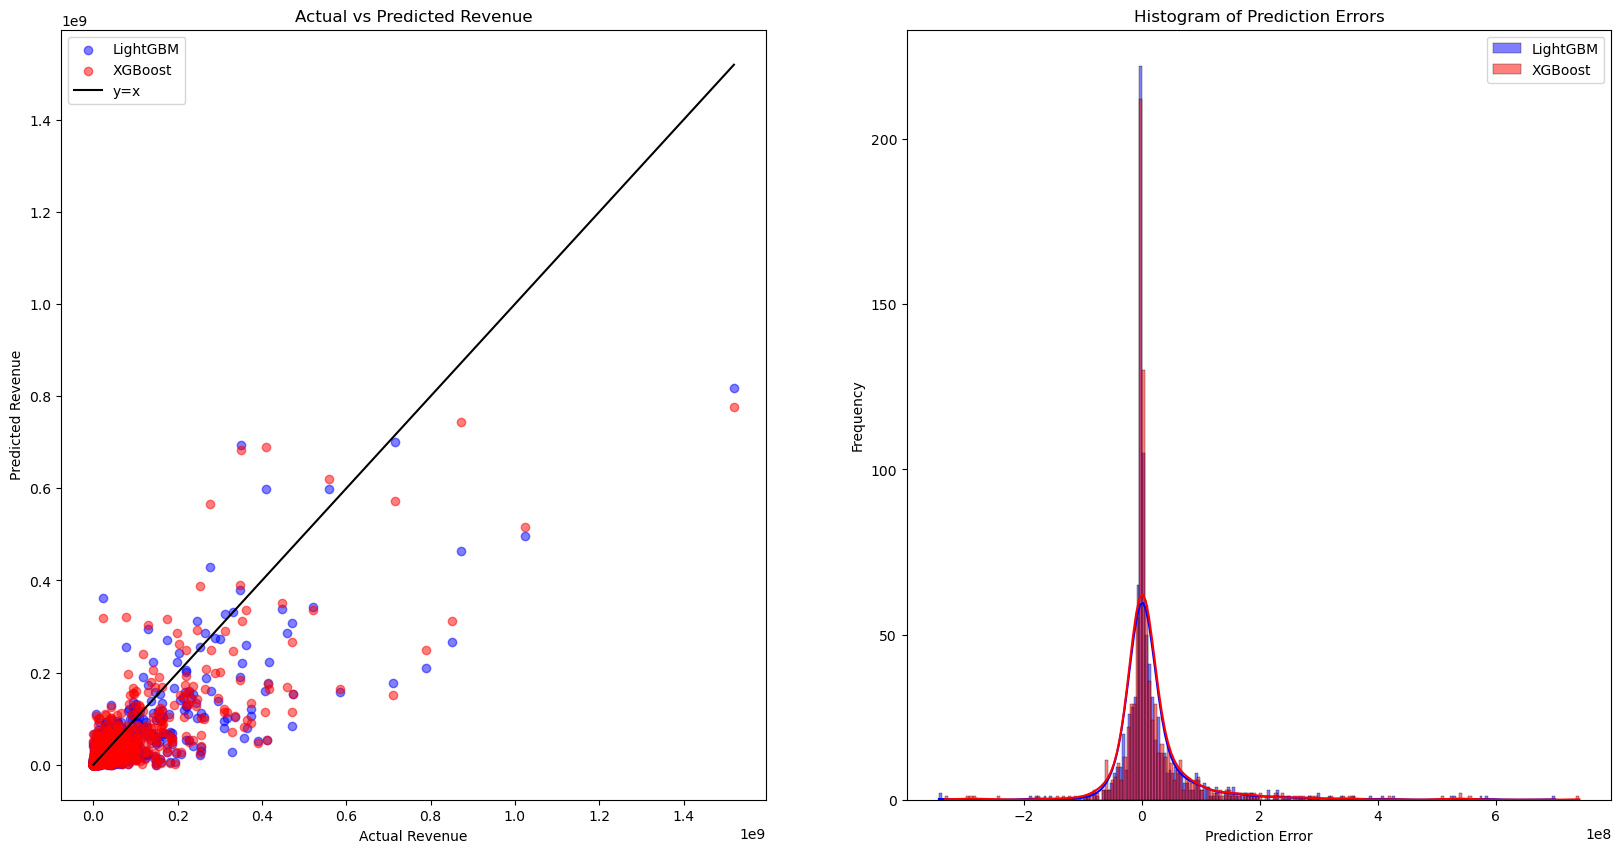

In [63]:
# Trier le DataFrame sur les valeurs réelles pour une meilleure visualisation
df_combined = df_combined.sort_values(by='revenue')

# Tracer les valeurs
# Créer une figure et des axes
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Scatter Plot
axes[0].scatter(df_combined['revenue'], df_combined['PredictedRevenue_model_lgb'], c='blue', label='LightGBM', alpha=0.5)
axes[0].scatter(df_combined['revenue'], df_combined['PredictedRevenue_model2_xgb'], c='red', label='XGBoost', alpha=0.5)
axes[0].plot(df_combined['revenue'], df_combined['revenue'], c='black', label='y=x')
axes[0].set_xlabel('Actual Revenue')
axes[0].set_ylabel('Predicted Revenue')
axes[0].set_title('Actual vs Predicted Revenue')
axes[0].legend()

# Histogramme des erreurs
sns.histplot(df_combined['revenue'] - df_combined['PredictedRevenue_model_lgb'], label='LightGBM', kde=True, color='blue', ax=axes[1])
sns.histplot(df_combined['revenue'] - df_combined['PredictedRevenue_model2_xgb'], label='XGBoost', kde=True, color='red', ax=axes[1])
axes[1].set_xlabel('Prediction Error')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of Prediction Errors')
axes[1].legend()

plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



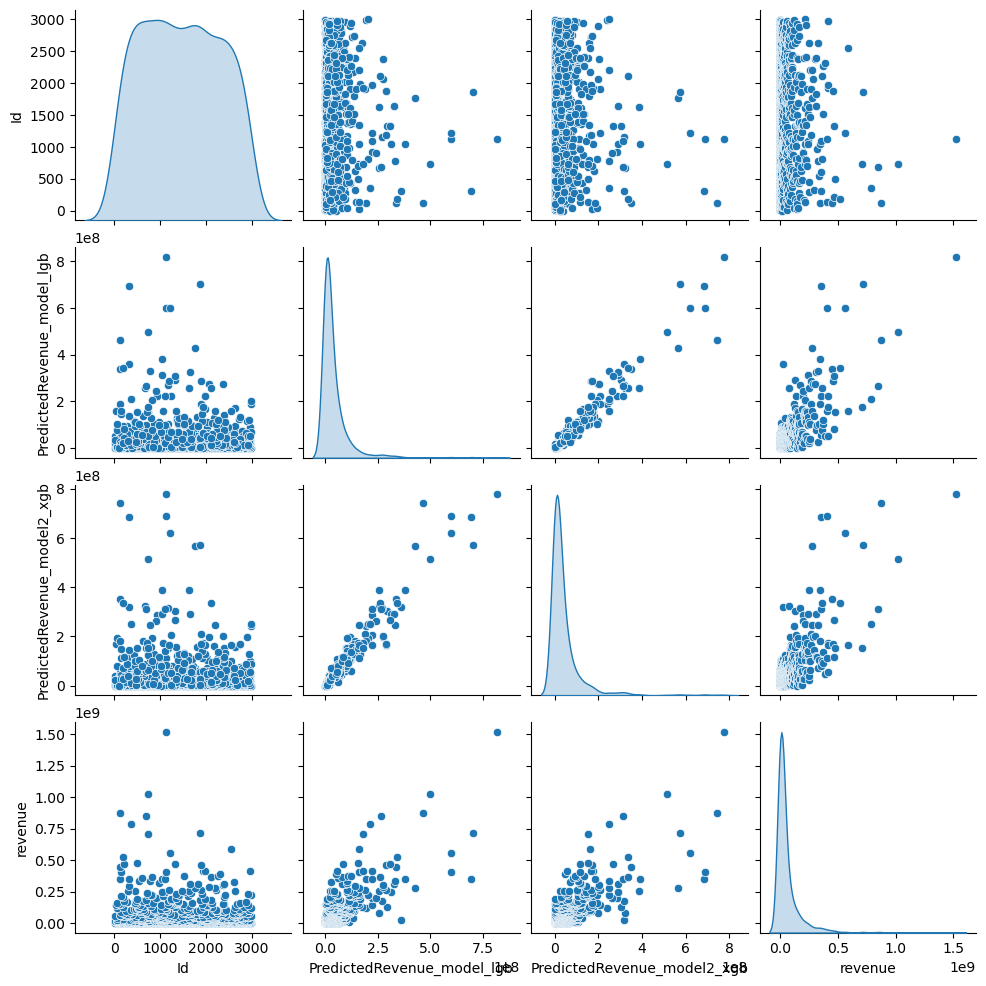

In [64]:
sns.pairplot(df_combined, diag_kind='kde')
plt.show()


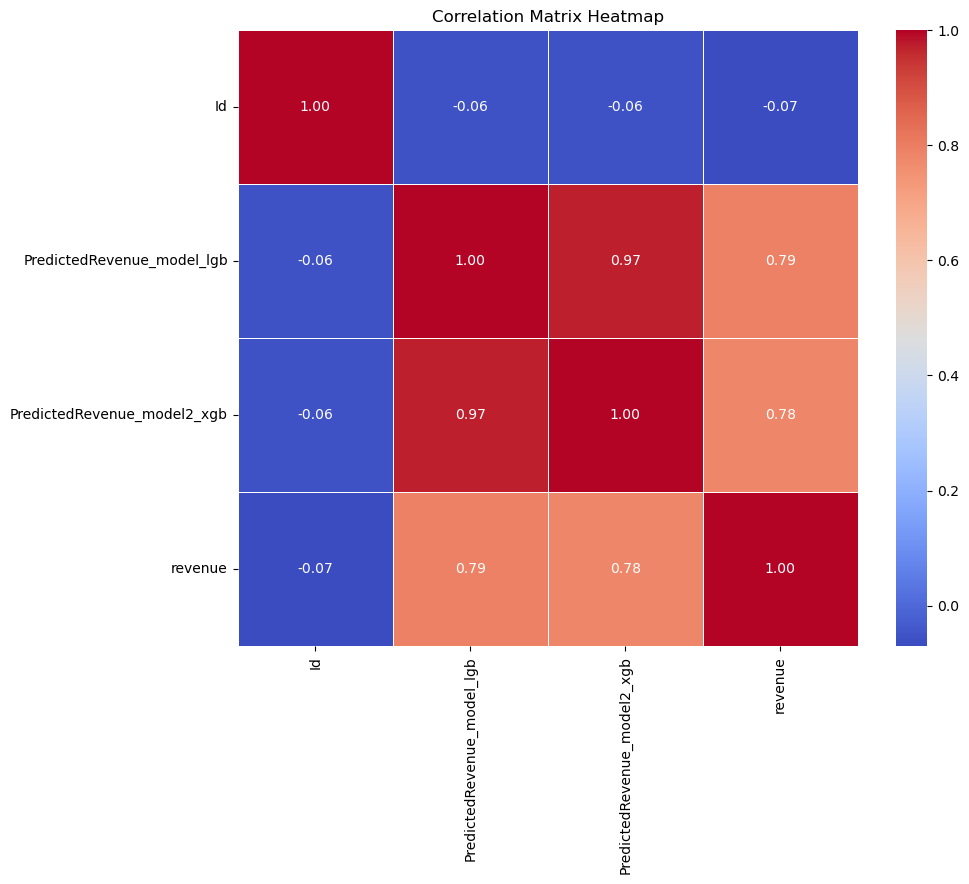

In [65]:
# Calcul de la matrice de corrélation
corr_matrix = df_combined.corr()

# Générer le heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [66]:
from sklearn.metrics import mean_squared_error

# Calcul du RMSE pour chaque modèle
rmse_model_lgb = np.sqrt(mean_squared_error(df_combined['revenue'], df_combined['PredictedRevenue_model_lgb']))
rmse_model_xgb = np.sqrt(mean_squared_error(df_combined['revenue'], df_combined['PredictedRevenue_model2_xgb']))

print(f"RMSE for LightGBM model: {rmse_model_lgb}")
print(f"RMSE for XGBoost model: {rmse_model_xgb}")


RMSE for LightGBM model: 76687391.3493662
RMSE for XGBoost model: 76860331.08126983


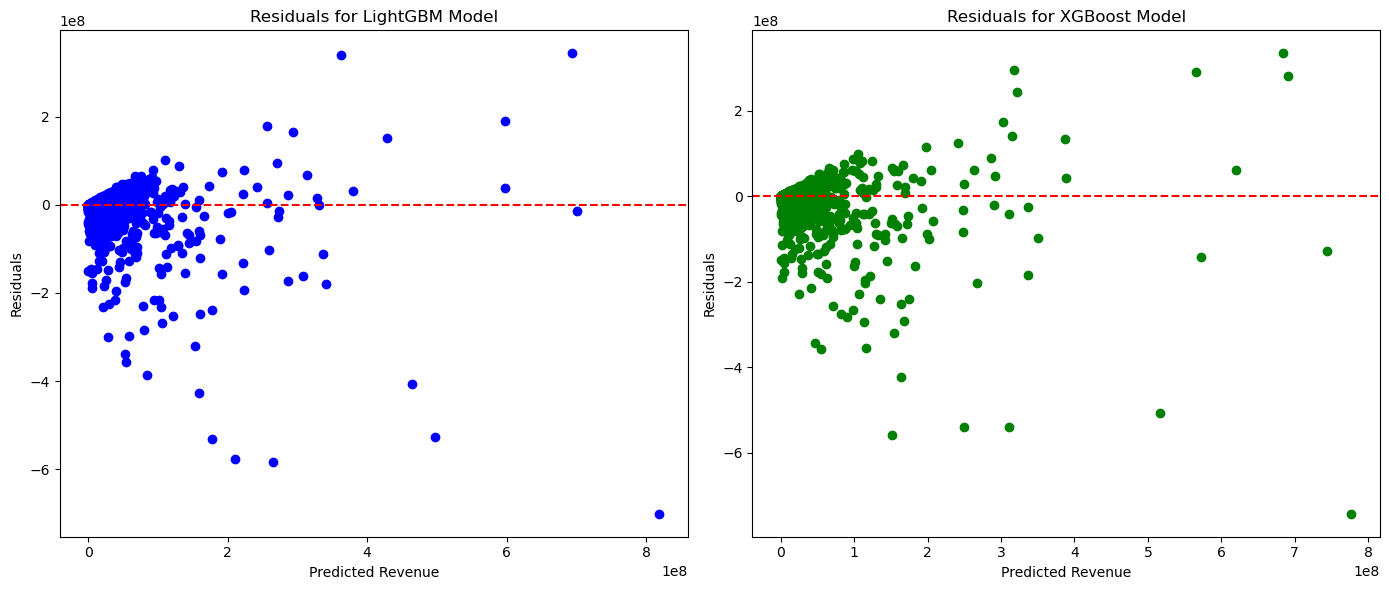

In [67]:
plt.figure(figsize=(14, 6))

# Scatter plot for LightGBM model
plt.subplot(1, 2, 1)
plt.scatter(df_combined['PredictedRevenue_model_lgb'], df_combined['PredictedRevenue_model_lgb'] - df_combined['revenue'], c='blue')
plt.title('Residuals for LightGBM Model')
plt.xlabel('Predicted Revenue')
plt.ylabel('Residuals')
plt.axhline(0, color='red', linestyle='--')

# Scatter plot for XGBoost model
plt.subplot(1, 2, 2)
plt.scatter(df_combined['PredictedRevenue_model2_xgb'], df_combined['PredictedRevenue_model2_xgb'] - df_combined['revenue'], c='green')
plt.title('Residuals for XGBoost Model')
plt.xlabel('Predicted Revenue')
plt.ylabel('Residuals')
plt.axhline(0, color='red', linestyle='--')

plt.tight_layout()
plt.show()


In [68]:
from scipy import stats
# Supposons que lgb_errors et xgb_errors soient les erreurs résiduelles des modèles LightGBM et XGBoost.
# Ces erreurs sont les différences entre les valeurs prédites et les valeurs réelles pour chaque point de données dans l'ensemble de test.
lgb_errors = np.array(df_combined['PredictedRevenue_model_lgb'] - df_combined['revenue'])
xgb_errors = np.array(df_combined['PredictedRevenue_model2_xgb'] - df_combined['revenue'])

# Effectuer un test t de Student pour les comparaisons appariées
t_stat, p_value = stats.ttest_rel(lgb_errors, xgb_errors)

# Afficher les résultats du test
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Interpréter les résultats
alpha = 0.05  # Niveau de signification
if p_value < alpha:
    print("Il y a une différence statistiquement significative entre les performances des deux modèles.")
else:
    print("Il n'y a pas de différence statistiquement significative entre les performances des deux modèles.")


t-statistic: -2.1554407177115023
p-value: 0.03139220109540755
Il y a une différence statistiquement significative entre les performances des deux modèles.
